In [1]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [5]:
NOTEBOOK_NAME = 'decoding_across_combined_1sec_time_bin_dhpc'

In [7]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'do_test_cross', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_cross_session', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_within', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_within_session', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [8]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [8]:
all_animals =      'dhpcg1','dhpcg20','dhpc24'
pre_animals =      'dhpcg1','dhpcg20','dhpc24'
post_animals =     'dhpcg1','dhpcg20','dhpc24'
pre_rev_animals =  'dhpcg1','dhpcg20','dhpc24'
post_rev_animals = 'dhpcg1','dhpcg20','dhpc24'
catch_animals =    'dhpcg1','dhpcg20'

In [9]:
preVSpost_animals =        'dhpcg1','dhpc24','dhpcg20'
preVSpre_rev_animals =     'dhpcg1','dhpc24','dhpcg20'
preVSpost_rev_animals =             'dhpc24','dhpcg20'
postVSpost_rev_animals =   'dhpcg1','dhpc24','dhpcg20'
postVSpre_rev_animals =    'dhpcg1','dhpc24','dhpcg20'
pre_revVSpost_rev_animals= 'dhpcg1','dhpc24','dhpcg20'
postVScatch_animals =      'dhpcg1'         ,'dhpcg20'
post_revVScatch_animals=   'dhpcg1'         ,'dhpcg20'

In [10]:
sessions = 'pre','post','pre_rev','post_rev','catch'

In [11]:
for sess in sessions:
    for dur in 1,: #use 5 for 0.5sec, 1 for 1 sec and 2 for 2sec
        exec("patterns_tb_%s_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,dur,sess,sess,dur,sess))
        exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,sess,sess,sess))

In [12]:
#delta_t0 = 1sec
#from referenced notebook, 14 time bins total beginning at 3s prior to odor onset and running through 11s post onset

#t_start0 = -3  # sec
#t_stop0 = 11  # sec

In [13]:
comparisons = 'preVSpost','preVSpre_rev','preVSpost_rev','postVSpre_rev','postVSpost_rev','pre_revVSpost_rev','postVScatch','post_revVScatch'

In [14]:
#get cross-session patterns
for comp in comparisons:
    for dur in 1,:
        exec("%s__patterns__%s = dict(zip(%s_animals, [ut.load_variable('%s_patterns_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[0],comp,
                                                    comp,comp.split('VS')[0],dur,comp))
        exec("%s__patterns__%s = dict(zip(%s_animals, [ut.load_variable('%s_patterns_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[1],comp,
                                                    comp,comp.split('VS')[1],dur,comp))
        exec("labels_%s_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[0],comp,comp.split('VS')[0],
                                                                            comp))
        exec("labels_%s_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[1],comp,comp.split('VS')[1],
                                                                            comp))

In [15]:
relabel_rwVSsh = {0:-3,1:1,2:0,-1:-1,-2:-2}
relabel_rwVScsm = {0:0,1:1,2:-3,-1:-1,-2:-2}
relabel_shVScsm = {0:0,1:-3,2:1,-1:-1,-2:-2}

for sess in sessions:
    exec("labels_rwVSsh_%s = {}"%sess)
    exec("labels_rwVScsm_%s = {}"%sess)
    exec("labels_shVScsm_%s = {}"%sess)
    for ani in eval("%s_animals"%sess):
        exec("labels_rwVSsh_%s[ani] = np.r_[[relabel_rwVSsh[l] for l in labels_%s[ani]]]"%(sess,sess))
        exec("labels_rwVScsm_%s[ani] = np.r_[[relabel_rwVScsm[l] for l in labels_%s[ani]]]"%(sess,sess))
        exec("labels_shVScsm_%s[ani] = np.r_[[relabel_shVScsm[l] for l in labels_%s[ani]]]"%(sess,sess))
        
for comp in comparisons:
    for i in range(2):
        exec("labels_rwVSsh_%s_%s = {}"%(comp,comp.split('VS')[i]))
        exec("labels_rwVScsm_%s_%s = {}"%(comp,comp.split('VS')[i]))
        exec("labels_shVScsm_%s_%s = {}"%(comp,comp.split('VS')[i]))
        for ani in eval("%s_animals"%comp):
            exec("labels_rwVSsh_%s_%s[ani] = np.r_[[relabel_rwVSsh[l] for l in labels_%s_%s[ani]]]"%(comp,comp.split('VS')[i],comp,comp.split('VS')[i]))
            exec("labels_rwVScsm_%s_%s[ani] = np.r_[[relabel_rwVScsm[l] for l in labels_%s_%s[ani]]]"%(comp,comp.split('VS')[i],comp,comp.split('VS')[i]))
            exec("labels_shVScsm_%s_%s[ani] = np.r_[[relabel_shVScsm[l] for l in labels_%s_%s[ani]]]"%(comp,comp.split('VS')[i],comp,comp.split('VS')[i]))

In [16]:
all_comparisons = 'preVSpost__patterns__pre',\
'preVSpost__patterns__post',\
'preVSpre_rev__patterns__pre',\
'preVSpre_rev__patterns__pre_rev',\
'preVSpost_rev__patterns__pre',\
'preVSpost_rev__patterns__post_rev',\
'postVSpre_rev__patterns__post',\
'postVSpre_rev__patterns__pre_rev',\
'postVSpost_rev__patterns__post',\
'postVSpost_rev__patterns__post_rev',\
'pre_revVSpost_rev__patterns__pre_rev',\
'pre_revVSpost_rev__patterns__post_rev',\
'postVScatch__patterns__post',\
'postVScatch__patterns__catch',\
'post_revVScatch__patterns__post_rev',\
'post_revVScatch__patterns__catch',\

In [17]:
for comp in all_comparisons:
    for t in range(len(patterns_tb_pre_1['dhpcg20'])):
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('__')[0]):
            try:
                #print comp.split('-')[0],
                #print ani,
                #print t,
                exec("%s_tb_%s['%s'] = %s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue

# set whether you want to use all cells, downsample to min cells for each compared session, or dowsample to global minimum of cells across all comparisons

In [18]:
#set downsampling parameter to:
#max_cells = all cells
#intraregion_min = downsample to the comparison with fewest cells within the same hippo region
#interregion_min = downsample to the comparison with fewest cells, considering both hippo regions
#gmin = the global minimum (pretty much corresponds to interregion_min)

downsample = 250

In [19]:
if downsample == 'max_cells':
    n_cells = None #will use all registered cells
if downsample == 'intraregion_min':
    n_cells = ut.load_variable('n_cells_across_min_vhpc', '../notebooks/autorestore/n_cells/')
if downsample == 'interregion_min':
    n_cells = ut.load_variable('n_cells_across_min_overall', '../notebooks/autorestore/n_cells/')
if downsample == 'gmin':
    n_cells = ut.load_variable('n_cells_gmin', '../notebooks/autorestore/n_cells/')
if downsample == 250:
    n_cells = 250

In [20]:
n_cells

250

# use distinct trials for train and test

In [21]:
#trying to use different trials for different time bins
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_within_session(patterns_t, labels_t, patterns_T, labels_T, n_cells=None, n_trials=None, classes=None):
    if classes==None:
        classes=[0,1]
    which_train = {}
    which_test = {}
    for ani in patterns_t.keys():
        which_train_a = np.random.permutation(np.where(labels_t[ani]==0)[0])
        if n_trials != None:  # if wanna restrict number of trials 
            which_train_a = which_train_a[:n_trials]
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels_t[ani]==1)[0])
        if n_trials != None:  # if wanna restrict number of trials 
            which_train_b = which_train_b[:n_trials]
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    patterns_dt = patterns_t.copy()
    labels_dt = labels_t.copy()
    patterns_dT = patterns_T.copy()
    labels_dT = labels_T.copy()
    for ani in patterns_t.keys():
        patterns_dt[ani] = patterns_dt[ani][which_train[ani]]
        labels_dt[ani] = labels_dt[ani][which_train[ani]]
        patterns_dT[ani] = patterns_dT[ani][which_test[ani]]
        labels_dT[ani] = labels_dT[ani][which_test[ani]]      
        
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_dt, labels_dt)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_dT, labels_dT)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        #print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        #print cells.shape,
    
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [22]:
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_cross_session(patterns_t, labels_t, patterns_T, labels_T, n_cells=None, n_trials=None, classes=None, half=True):
    if classes==None:
        classes=[0,1]
    which_train = {}
    which_test = {}
    for ani in patterns_t.keys():
        which_train_a = np.random.permutation(np.where(labels_t[ani]==0)[0])
        if n_trials != None:  # if wanna restrict number of trials 
            which_train_a = which_train_a[:n_trials]
        if half == True:      # if only wanna use half of available trials (to match the number of trials used for cross tb decoding)
            which_train_a = which_train_a[len(which_train_a)/2:]            
        which_test_a = np.random.permutation(np.where(labels_T[ani]==0)[0])
        if n_trials != None: 
            which_test_a = which_test_a[:n_trials]
        if half == True:
            which_test_a = which_test_a[len(which_test_a)/2:]
            
        
        which_train_b = np.random.permutation(np.where(labels_t[ani]==1)[0])
        if n_trials != None:
            which_train_b = which_train_b[:n_trials]
        if half == True:
            which_train_b = which_train_b[len(which_train_b)/2:]
        which_test_b = np.random.permutation(np.where(labels_T[ani]==1)[0])
        if n_trials != None:  # if wanna restrict number of trials 
            which_test_b = which_test_b[:n_trials]
        if half == True:
            which_test_b = which_test_b[len(which_test_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_dt = patterns_t.copy()
    labels_dt = labels_t.copy()
    patterns_dT = patterns_T.copy()
    labels_dT = labels_T.copy()
    for ani in patterns_t.keys():
        patterns_dt[ani] = patterns_dt[ani][which_train[ani]]
        labels_dt[ani] = labels_dt[ani][which_train[ani]]
        patterns_dT[ani] = patterns_dT[ani][which_test[ani]]
        labels_dT[ani] = labels_dT[ani][which_test[ani]]
        
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_dt, labels_dt)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_dT, labels_dT)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        #print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        #print cells.shape,
    
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [23]:
all_comparisons_sans_catch = 'preVSpost__patterns__pre',\
'preVSpost__patterns__post',\
'preVSpre_rev__patterns__pre',\
'preVSpre_rev__patterns__pre_rev',\
'preVSpost_rev__patterns__pre',\
'preVSpost_rev__patterns__post_rev',\
'postVSpre_rev__patterns__post',\
'postVSpre_rev__patterns__pre_rev',\
'postVSpost_rev__patterns__post',\
'postVSpost_rev__patterns__post_rev',\
'pre_revVSpost_rev__patterns__pre_rev',\
'pre_revVSpost_rev__patterns__post_rev'

In [24]:
all_comparisons_catch = 'postVScatch__patterns__post',\
'postVScatch__patterns__catch',\
'post_revVScatch__patterns__post_rev',\
'post_revVScatch__patterns__catch',\

In [25]:
%%time
#test across (and within) time bins within a session

n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    if vs == 'all':
        classes = range(3)  # this won't work, as fxn is written to only pull labels = 1 or 0 for test/train datasets
    else:
        classes = None
    for comp in all_comparisons_sans_catch:
        for t in range(13):
            for c in range(13):
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))
                #print comp,t,c," ",
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within_session(%s_tb_%s,labels%s_%s,%s_tb_%s,labels%s_%s,n_cells=n_cells,classes=classes)\
                for r in range(n_loops)]]'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c,
                                            comp,t,vs[1],comp.split('__')[-1],comp,c,vs[1],comp.split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],comp.split('__')[0],comp.split('__')[-1],comp.split('__')[0],comp.split('__')[-1]))
        print 'DONE!',
        print '    ',

rwVScsm: preVSpost__pre & preVSpost__pre DONE!      rwVScsm: preVSpost__post & preVSpost__post DONE!      rwVScsm: preVSpre_rev__pre & preVSpre_rev__pre DONE!      rwVScsm: preVSpre_rev__pre_rev & preVSpre_rev__pre_rev DONE!      rwVScsm: preVSpost_rev__pre & preVSpost_rev__pre DONE!      rwVScsm: preVSpost_rev__post_rev & preVSpost_rev__post_rev DONE!      rwVScsm: postVSpre_rev__post & postVSpre_rev__post DONE!      rwVScsm: postVSpre_rev__pre_rev & postVSpre_rev__pre_rev DONE!      rwVScsm: postVSpost_rev__post & postVSpost_rev__post DONE!      rwVScsm: postVSpost_rev__post_rev & postVSpost_rev__post_rev DONE!      rwVScsm: pre_revVSpost_rev__pre_rev & pre_revVSpost_rev__pre_rev DONE!      rwVScsm: pre_revVSpost_rev__post_rev & pre_revVSpost_rev__post_rev DONE!      shVScsm: preVSpost__pre & preVSpost__pre DONE!      shVScsm: preVSpost__post & preVSpost__post DONE!      shVScsm: preVSpre_rev__pre & preVSpre_rev__pre DONE!      shVScsm: preVSpre_rev__pre_rev & preVSpre_rev__pre_rev D

In [26]:
%%time
#test across (and within) time bins within a session

n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    if vs[0] == 'rwVSsh':
        n_trials = 40
    if vs[0] != 'rwVSsh':
        n_trials = 20
    classes = None
    for comp in all_comparisons_catch:
        for t in range(13):
            for c in range(13):
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))
                #print comp,t,c," ",
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within_session(%s_tb_%s,labels%s_%s,%s_tb_%s,\
                      labels%s_%s, n_cells=n_cells, n_trials=n_trials, classes=classes)\
                for r in range(n_loops)]]'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c,
                                            comp,t,vs[1],comp.split('__')[-1],comp,c,vs[1],comp.split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],comp.split('__')[0],comp.split('__')[-1],comp.split('__')[0],comp.split('__')[-1]))
        print 'DONE!',
        print '    ',

rwVScsm: postVScatch__post & postVScatch__post DONE!      rwVScsm: postVScatch__catch & postVScatch__catch DONE!      rwVScsm: post_revVScatch__post_rev & post_revVScatch__post_rev DONE!      rwVScsm: post_revVScatch__catch & post_revVScatch__catch DONE!      shVScsm: postVScatch__post & postVScatch__post DONE!      shVScsm: postVScatch__catch & postVScatch__catch DONE!      shVScsm: post_revVScatch__post_rev & post_revVScatch__post_rev DONE!      shVScsm: post_revVScatch__catch & post_revVScatch__catch DONE!      rwVSsh: postVScatch__post & postVScatch__post DONE!      rwVSsh: postVScatch__catch & postVScatch__catch DONE!      rwVSsh: post_revVScatch__post_rev & post_revVScatch__post_rev DONE!      rwVSsh: post_revVScatch__catch & post_revVScatch__catch DONE!     CPU times: user 9min 2s, sys: 464 ms, total: 9min 2s
Wall time: 9min 2s



In [27]:
%%time
#test across session pairs
AC = all_comparisons_sans_catch
n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    #if vs == 'all':
    #    classes = range(3)  # this won't work, as fxn is written to only pull labels = 1 or 0 for test/train datasets
    #else:
    classes = None
    for i in range(0,len(AC),2):
        for t in range(13):
            for c in range(13):
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))
                #print AC[i],t,c," ",
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross_session(%s_tb_%s,labels%s_%s,%s_tb_%s,labels%s_%s,n_cells=n_cells,classes=classes)\
                for r in range(n_loops)]]'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c,
                                            AC[i],t,vs[1],AC[i].split('__')[-1],AC[i+1],c,vs[1],AC[i+1].split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[0],AC[i+1].split('__')[-1]))
        print 'DONE!'
        print '    ',

rwVScsm: preVSpost__pre & preVSpost__post DONE!
     rwVScsm: preVSpre_rev__pre & preVSpre_rev__pre_rev DONE!
     rwVScsm: preVSpost_rev__pre & preVSpost_rev__post_rev DONE!
     rwVScsm: postVSpre_rev__post & postVSpre_rev__pre_rev DONE!
     rwVScsm: postVSpost_rev__post & postVSpost_rev__post_rev DONE!
     rwVScsm: pre_revVSpost_rev__pre_rev & pre_revVSpost_rev__post_rev DONE!
     shVScsm: preVSpost__pre & preVSpost__post DONE!
     shVScsm: preVSpre_rev__pre & preVSpre_rev__pre_rev DONE!
     shVScsm: preVSpost_rev__pre & preVSpost_rev__post_rev DONE!
     shVScsm: postVSpre_rev__post & postVSpre_rev__pre_rev DONE!
     shVScsm: postVSpost_rev__post & postVSpost_rev__post_rev DONE!
     shVScsm: pre_revVSpost_rev__pre_rev & pre_revVSpost_rev__post_rev DONE!
     rwVSsh: preVSpost__pre & preVSpost__post DONE!
     rwVSsh: preVSpre_rev__pre & preVSpre_rev__pre_rev DONE!
     rwVSsh: preVSpost_rev__pre & preVSpost_rev__post_rev DONE!
     rwVSsh: postVSpre_rev__post & postVSpre_rev

In [28]:
%%time
#test across session pairs that include catch. only use 20 trials to match for the 20 CSm trials (and use all trials, not half)
AC = all_comparisons_catch
n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    if vs[0] == 'rwVSsh':
        half = True
        n_trials = 40
    if vs[0] != 'rwVSsh':
        half = False
        n_trials = 20
    classes = None
    for i in range(0,len(AC),2):
        for t in range(13):
            for c in range(13):
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))
                #print AC[i],t,c," ",
                exec('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross_session(%s_tb_%s,labels%s_%s,%s_tb_%s,labels%s_%s,n_cells=n_cells,classes=classes,\
                      n_trials=n_trials, half=half)\
                for r in range(n_loops)]]'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c,
                                            AC[i],t,vs[1],AC[i].split('__')[-1],AC[i+1],c,vs[1],AC[i+1].split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[0],AC[i+1].split('__')[-1]))
        print 'DONE!'
        print '    ',

rwVScsm: postVScatch__post & postVScatch__catch DONE!
     rwVScsm: post_revVScatch__post_rev & post_revVScatch__catch DONE!
     shVScsm: postVScatch__post & postVScatch__catch DONE!
     shVScsm: post_revVScatch__post_rev & post_revVScatch__catch DONE!
     rwVSsh: postVScatch__post & postVScatch__catch DONE!
     rwVSsh: post_revVScatch__post_rev & post_revVScatch__catch DONE!
    CPU times: user 4min 54s, sys: 328 ms, total: 4min 54s
Wall time: 4min 54s



## Now use max cells

In [29]:
%%time
#test across (and within) time bins within a session. Use max cell #

n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    if vs == 'all':
        classes = range(3)  # this won't work, as fxn is written to only pull labels = 1 or 0 for test/train datasets
    else:
        classes = None
    for comp in all_comparisons_sans_catch:
        for t in range(13):
            for c in range(13):
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))
                #print comp,t,c," ",
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within_session(%s_tb_%s,labels%s_%s,%s_tb_%s,\
                      labels%s_%s,n_cells=None,classes=classes)\
                for r in range(n_loops)]]'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c,
                                            comp,t,vs[1],comp.split('__')[-1],comp,c,vs[1],comp.split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],comp.split('__')[0],comp.split('__')[-1],comp.split('__')[0],comp.split('__')[-1]))
        print 'DONE!',
        print '    ',

360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 

In [30]:
%%time
#test across (and within) time bins within a session

n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    if vs[0] == 'rwVSsh':
        n_trials = 40
    if vs[0] != 'rwVSsh':
        n_trials = 20
    classes = None
    for comp in all_comparisons_catch:
        for t in range(13):
            for c in range(13):
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))
                #print comp,t,c," ",
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within_session(%s_tb_%s,labels%s_%s,%s_tb_%s,\
                      labels%s_%s, n_cells=None, n_trials=n_trials, classes=classes)\
                for r in range(n_loops)]]'%(vs[0],comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c,
                                            comp,t,vs[1],comp.split('__')[-1],comp,c,vs[1],comp.split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],comp.split('__')[0],comp.split('__')[-1],comp.split('__')[0],comp.split('__')[-1]))
        print 'DONE!',
        print '    ',

125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 

In [31]:
%%time
#test across session pairs. Use max cells per condition
AC = all_comparisons_sans_catch
n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    if vs == 'all':
        classes = range(3)  #this won't work as fxn is currently written
    else:
        classes = None
    for i in range(0,len(AC),2):
        for t in range(13):
            for c in range(13):
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))
                #print AC[i],t,c," ",
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross_session(%s_tb_%s,labels%s_%s,%s_tb_%s,labels%s_%s,n_cells=None,classes=classes)\
                for r in range(n_loops)]]'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c,
                                            AC[i],t,vs[1],AC[i].split('__')[-1],AC[i+1],c,vs[1],AC[i+1].split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[0],AC[i+1].split('__')[-1]))
        print 'DONE!',
        print '    ',

360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 

In [32]:
%%time
#test across session pairs that include catch. only use 20 trials to match for the 20 CSm trials (and use all trials, not half)
AC = all_comparisons_catch
n_loops=15
for vs in zip(('rwVScsm','shVScsm','rwVSsh'),('_rwVScsm','_shVScsm','_rwVSsh')):
    if vs[0] == 'rwVSsh':
        half = True
        n_trials = 40
    if vs[0] != 'rwVSsh':
        half= False
        n_trials=20
    classes = None
    for i in range(0,len(AC),2):
        for t in range(13):
            for c in range(13):
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))
                #print AC[i],t,c," ",
                exec('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross_session(%s_tb_%s,labels%s_%s,%s_tb_%s,labels%s_%s,n_cells=None,classes=classes,\
                      n_trials=20, half=False)\
                for r in range(n_loops)]]'%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c,
                                            AC[i],t,vs[1],AC[i].split('__')[-1],AC[i+1],c,vs[1],AC[i+1].split('__')[-1]))
        exec("print '%s: %s__%s & %s__%s',"%(vs[0],AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[0],AC[i+1].split('__')[-1]))
        print 'DONE!'
        print '    ',

125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 

### organize data for plotting. First collect all data into array, then make diff arrays with just the means (for implots)
it's a mess, I know. But it's functional!

In [33]:
for t in range(13):
    exec('distinct_all_%s = {}'%t)
    exec('distinct_rwVScsm_%s = {}'%t)
    exec('distinct_shVScsm_%s = {}'%t)
    exec('distinct_rwVSsh_%s = {}'%t)
    
AC = all_comparisons
for vs in 'rwVScsm','shVScsm','rwVSsh':
    for i in range(0,len(AC),2):
        for t in range(13):
            exec("distinct_%s_%s['%s__%s__%s'] = []"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("distinct_%s_%s['%s__%s__%s']"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1])).insert(c,(eval('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,AC[i].split('__')[0],
                                AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))))

for vs in 'rwVScsm','shVScsm','rwVSsh':
    for comp in all_comparisons:
        for t in range(13):
            exec("distinct_%s_%s['%s__%s__%s'] = []"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct%s['%s_%s_%s']"%(t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
                eval("distinct_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],
                     comp.split('__')[-1])).insert(c,(eval('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,comp.split('__')[0],
                     comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))))

In [34]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("distinct_%s={}"%vs)
    for i in distinct_rwVSsh_0:
        exec("distinct_%s[i]=[]"%vs)
        for r in range(len(distinct_rwVSsh_0[i])):
            eval("distinct_%s[i]"%vs).append(eval("distinct_%s_%s"%(vs,r))[i])
        np.array([eval("distinct_%s[i]"%vs)])

In [35]:
for t in range(13):
    #exec('distinct_means_all_%s = {}'%t)
    exec('distinct_means_rwVScsm_%s = {}'%t)
    exec('distinct_means_shVScsm_%s = {}'%t)
    exec('distinct_means_rwVSsh_%s = {}'%t)

AC = all_comparisons
for vs in 'rwVScsm','shVScsm','rwVSsh':
    for i in range(0,len(AC),2):
        for t in range(13):
            exec("distinct_means_%s_%s['%s__%s__%s'] = []"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct_means%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("distinct_means_%s_%s['%s__%s__%s']"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],
                    AC[i+1].split('__')[-1])).insert(c,(eval('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,AC[i].split('__')[0],
                    AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c)).mean(1)).mean())

for vs in 'rwVScsm','shVScsm','rwVSsh':
    for comp in all_comparisons:
        for t in range(13):
            exec("distinct_means_%s_%s['%s__%s__%s'] = []"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct_means%s['%s_%s_%s']"%(t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
                eval("distinct_means_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],
                    comp.split('__')[-1])).insert(c,(eval('%s_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,comp.split('__')[0],
                    comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c)).mean(1)).mean())

In [36]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("distinct_means_%s={}"%vs)
    for i in distinct_means_rwVSsh_0:
        exec("distinct_means_%s[i]=[]"%vs)
        for r in range(len(distinct_means_rwVSsh_0[i])):
            eval("distinct_means_%s[i]"%vs).append(eval("distinct_means_%s_%s"%(vs,r))[i])
        np.array([eval("distinct_means_%s[i]"%vs)])

In [37]:
mega_list_col1 = ['preVSpost__pre__pre'],['preVSpost__pre__post'],['preVSpre_rev__pre__pre_rev'],['preVSpost_rev__pre__post_rev']
mega_list_col2 = ['preVSpost__pre__post'],['postVSpre_rev__post__post'],['postVSpre_rev__post__pre_rev'],['postVSpost_rev__post__post_rev']
mega_list_col3 = ['preVSpre_rev__pre__pre_rev'],['postVSpre_rev__post__pre_rev'],['postVSpre_rev__pre_rev__pre_rev'],['pre_revVSpost_rev__pre_rev__post_rev']
mega_list_col4 = ['preVSpost_rev__pre__post_rev'],['postVSpost_rev__post__post_rev'],['pre_revVSpost_rev__pre_rev__post_rev'],['postVSpost_rev__post_rev__post_rev']

In [38]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    for col in range(1,5):
        exec("mega_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,vs))
        for x in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
            exec("mega_col%s_%s[x] = []"%(col,vs))
            for c in range(len(mega_list_col1)):
                for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
                        #print col,x,c,comp,y,'ok',
                        eval("mega_col%s_%s[x]"%(col,vs)).insert((13*c)+y, eval("distinct_means_%s_%s[comp][y]"%(vs,x)))

In [39]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("mega_distinct_means_%s = mega_col1_%s +mega_col2_%s +mega_col3_%s +mega_col4_%s"%(vs,vs,vs,vs,vs))

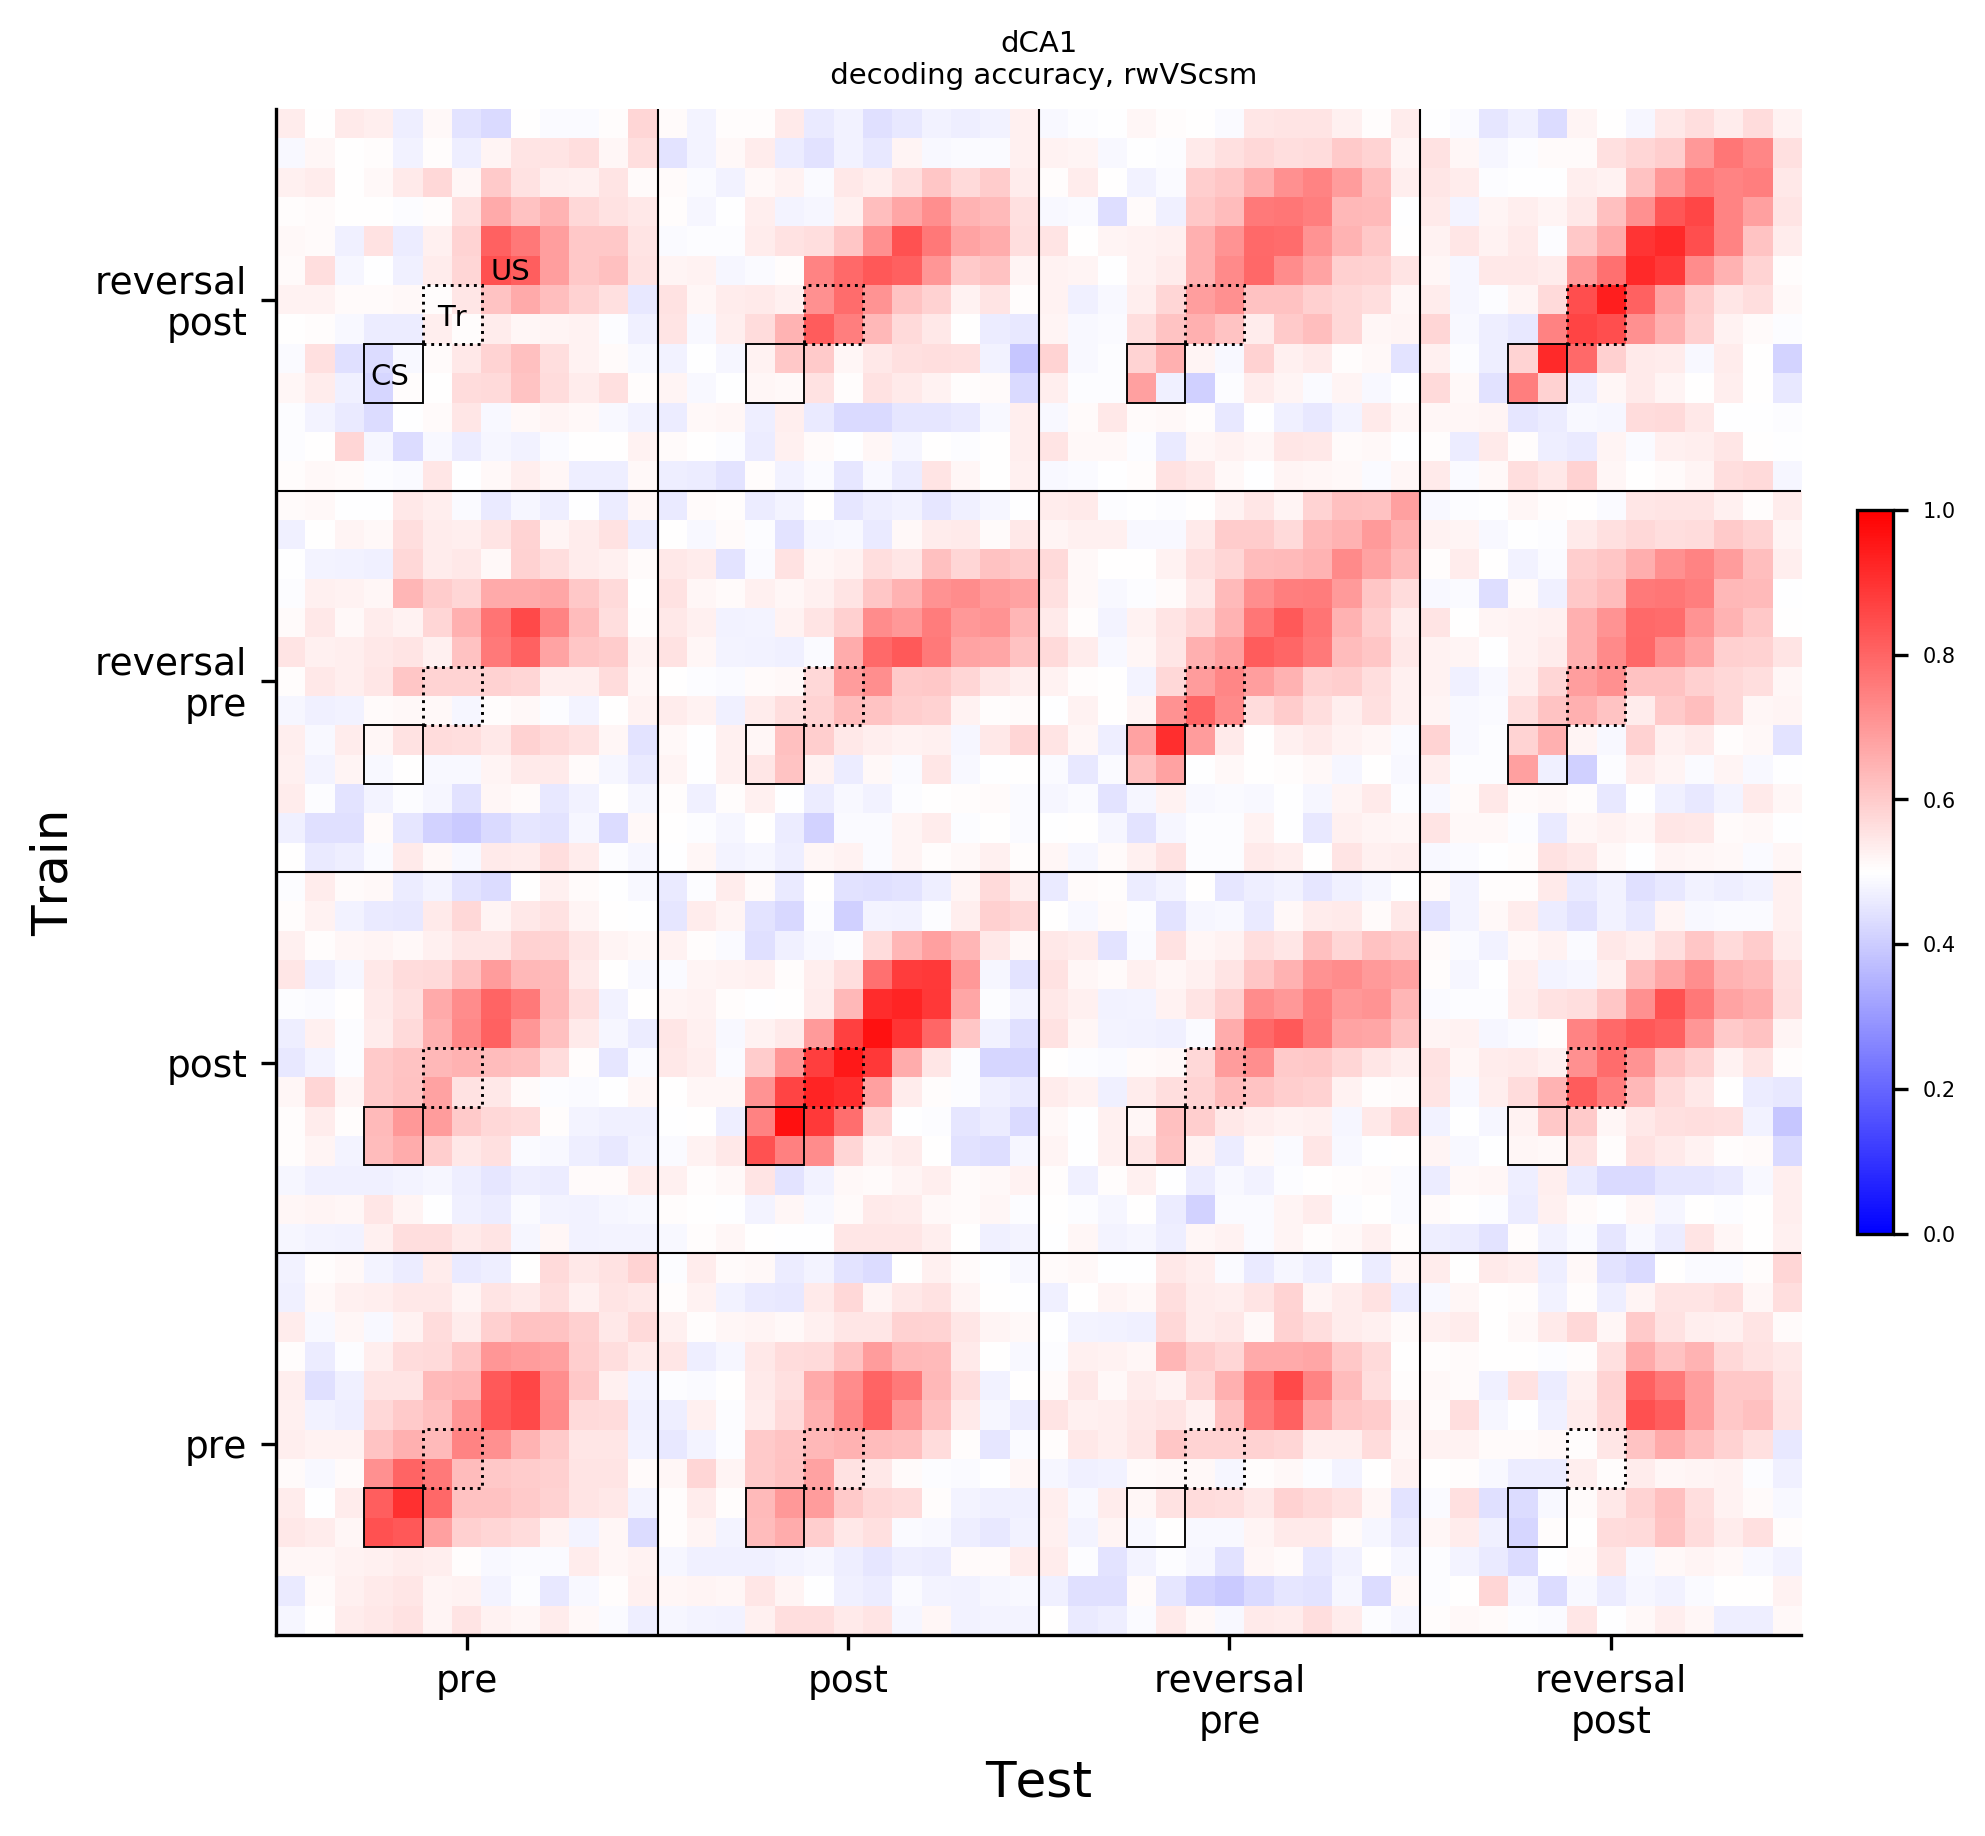

In [84]:
##to_plot = 'all'
to_plot = 'rwVScsm'
#to_plot = 'shVScsm'
#to_plot = 'rwVSsh'

fig,ax = pl.subplots(1,figsize=(8,8))
im = ax.imshow(eval("mega_distinct_means_%s"%to_plot),origin='lower', interpolation='nearest',vmin=0, vmax=1,cmap='bwr')
ticks = [6,19,32,45]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','reversal\npre','reversal\npost'],fontsize=9)
ax.set_yticklabels(['pre','post','reversal\npre','reversal\npost'],fontsize=9)
ax.set_ylabel('Train', fontsize=12)
ax.set_xlabel('Test', fontsize=12)
pl.hlines([12.5,25.5,38.5],-0.5,51.5,color='k')
pl.vlines([12.5,25.5,38.5],-0.5,51.5,color='k')
pl.title("dCA1\n decoding accuracy, "+to_plot)
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(4):
    CS1 = patches.Rectangle((i*13+2.5, 0*13+2.5),2,2,linewidth=.45,edgecolor='k',facecolor='none')
    CS2 = patches.Rectangle((i*13+2.5, 1*13+2.5),2,2,linewidth=.45,edgecolor='k',facecolor='none')
    CS3 = patches.Rectangle((i*13+2.5, 2*13+2.5),2,2,linewidth=.45,edgecolor='k',facecolor='none')
    CS4 = patches.Rectangle((i*13+2.5, 3*13+2.5),2,2,linewidth=.45,edgecolor='k',facecolor='none')
    Tr1 = patches.Rectangle((i*13+4.5, 0*13+4.5),2,2,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*13+4.5, 1*13+4.5),2,2,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*13+4.5, 2*13+4.5),2,2,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*13+4.5, 3*13+4.5),2,2,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)

pl.text(2.7,42.1,"CS",fontsize=7, color='k')
pl.text(5.0,44.1,"Tr",fontsize=7, color='k')
pl.text(6.8,45.7,"US",fontsize=7, color='k')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, shrink=0.4, pad=0.03)

fig.savefig('../img/%s_MEGA_MATRIX_%s.jpg'%(NOTEBOOK_NAME,to_plot))

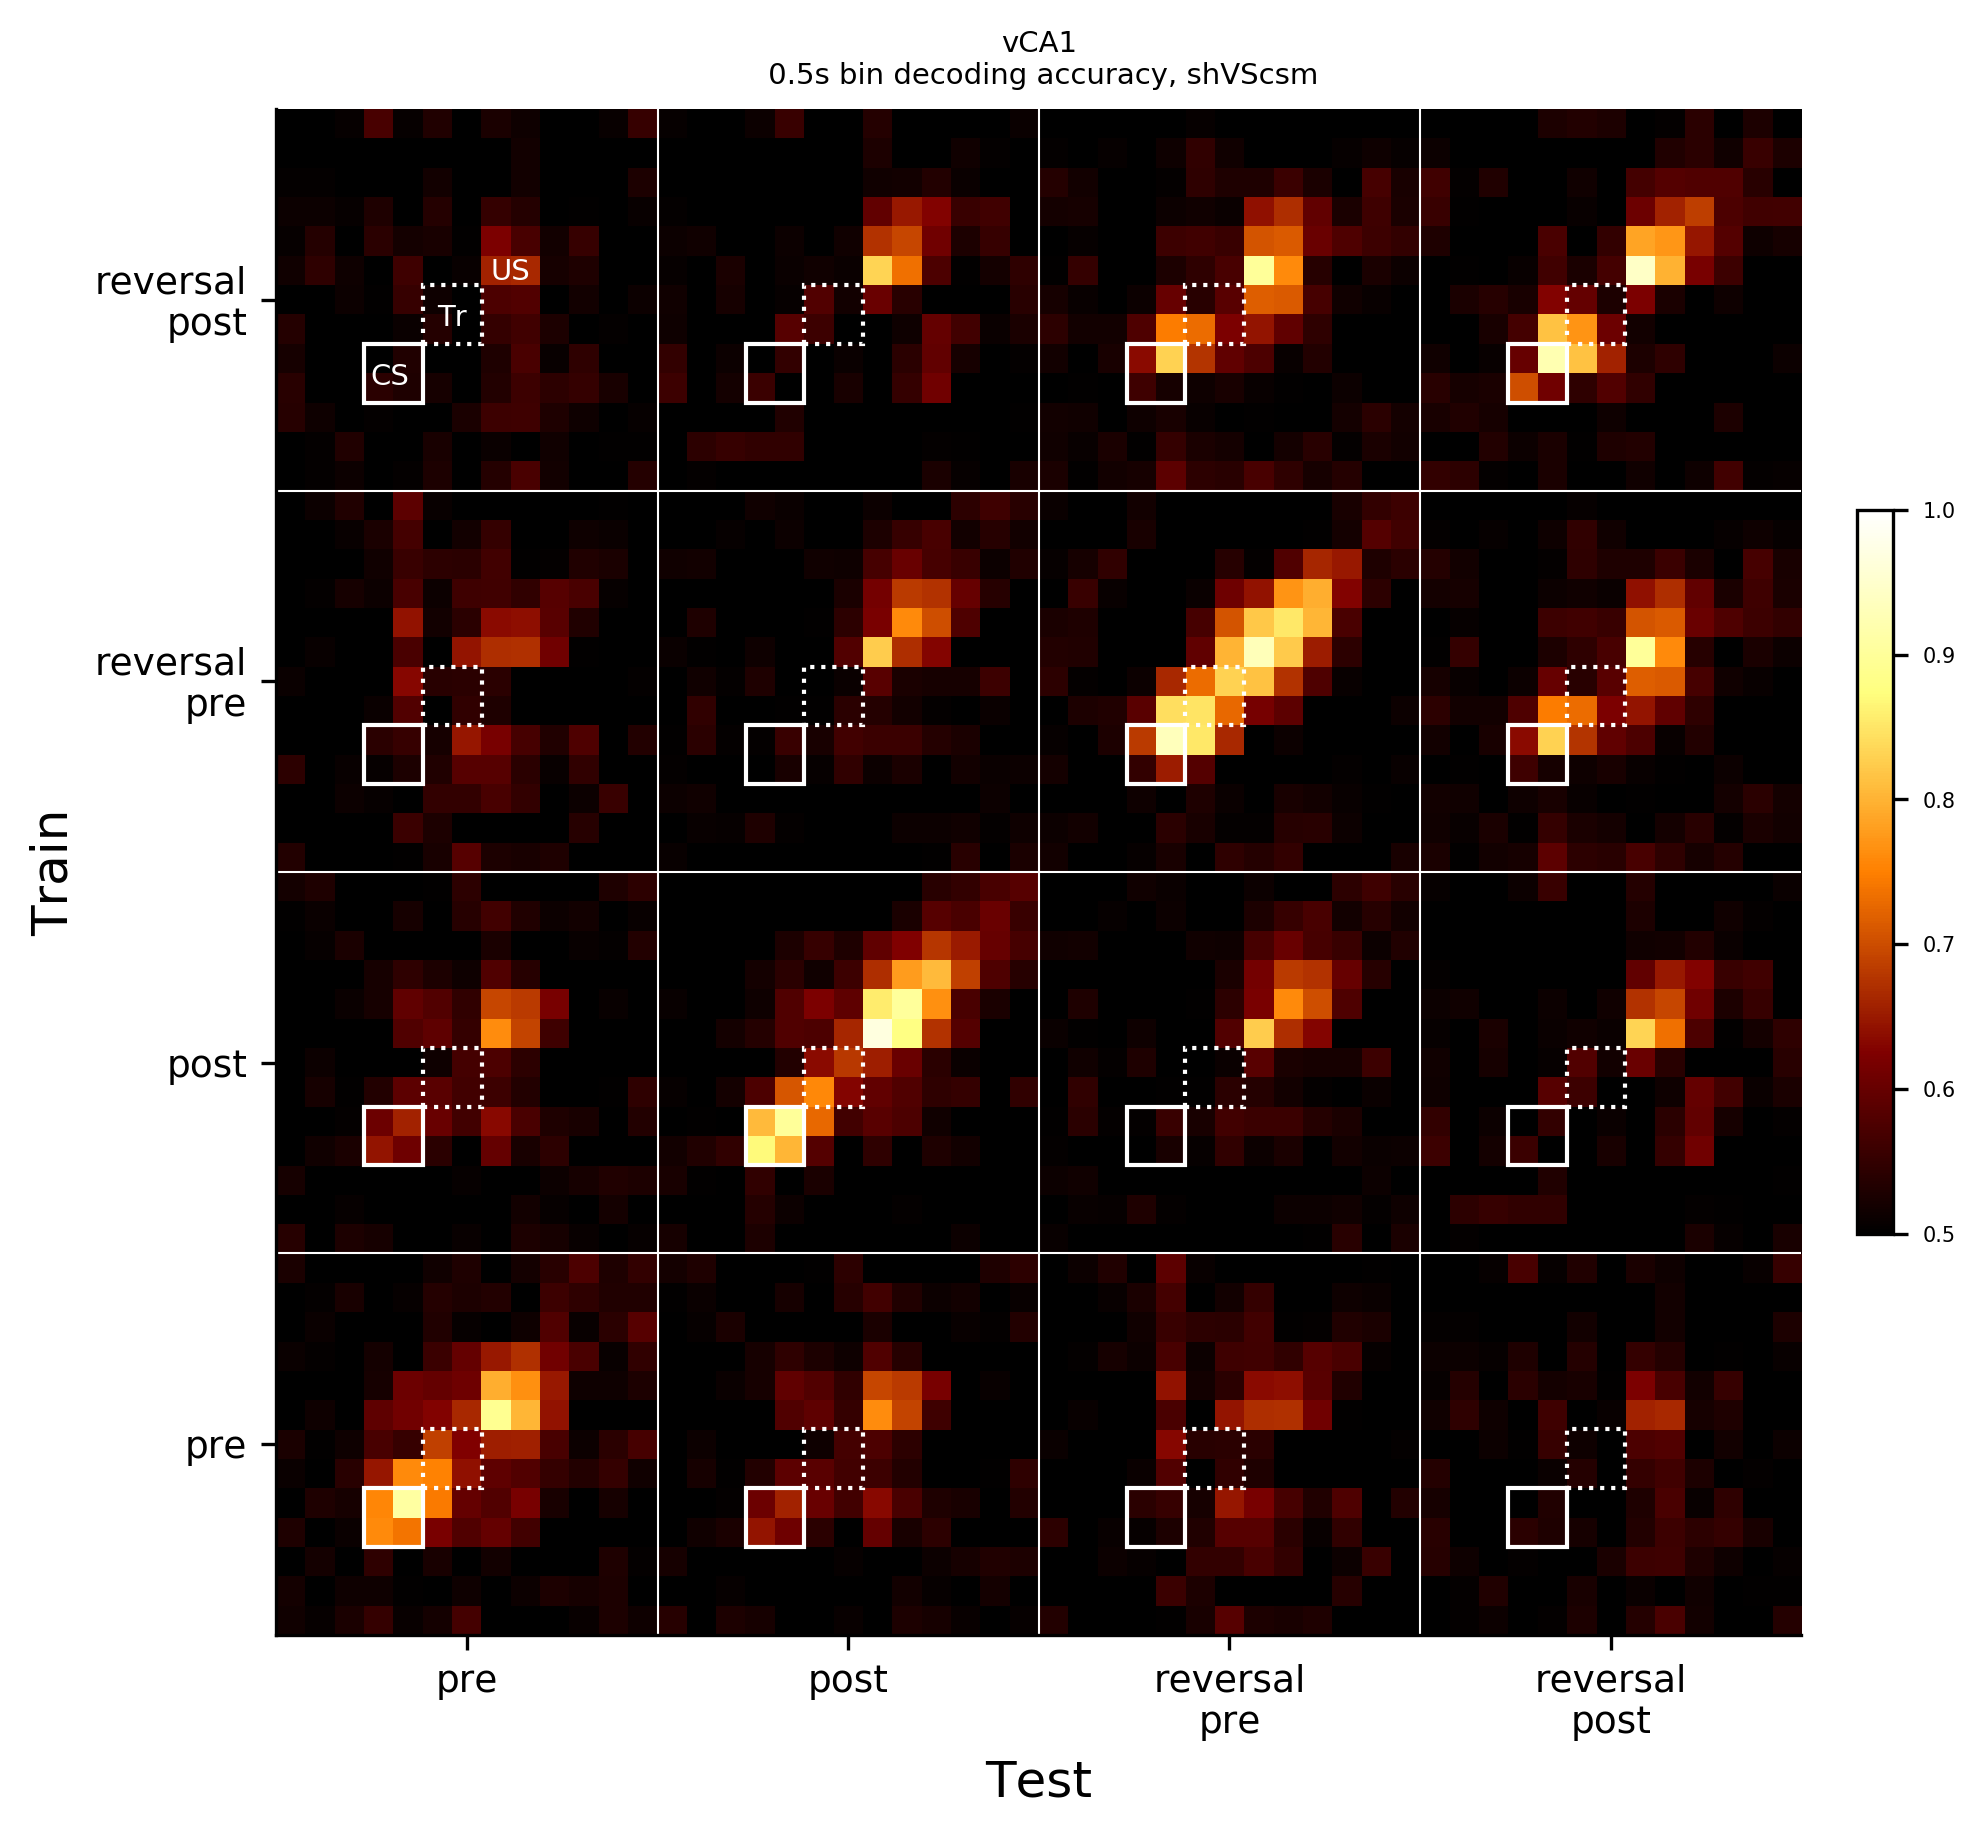

In [41]:
###to_plot = 'all'
#to_plot = 'rwVScsm'
to_plot = 'shVScsm'
#to_plot = 'rwVSsh'

fig,ax = pl.subplots(1,figsize=(8,8))
im = ax.imshow(eval("mega_distinct_means_%s"%to_plot),origin='lower', interpolation='nearest',vmin=0.5, vmax=1,cmap='afmhot')
ticks = [6,19,32,45]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','reversal\npre','reversal\npost'],fontsize=9)
ax.set_yticklabels(['pre','post','reversal\npre','reversal\npost'],fontsize=9)
ax.set_ylabel('Train', fontsize=12)
ax.set_xlabel('Test', fontsize=12)
pl.hlines([12.5,25.5,38.5],-0.5,51.5,color='w')
pl.vlines([12.5,25.5,38.5],-0.5,51.5,color='w')
pl.title("vCA1\n 0.5s bin decoding accuracy, "+to_plot)

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(4):
    CS1 = patches.Rectangle((i*13+2.5, 0*13+2.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    CS2 = patches.Rectangle((i*13+2.5, 1*13+2.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    CS3 = patches.Rectangle((i*13+2.5, 2*13+2.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    CS4 = patches.Rectangle((i*13+2.5, 3*13+2.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    Tr1 = patches.Rectangle((i*13+4.5, 0*13+4.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*13+4.5, 1*13+4.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*13+4.5, 2*13+4.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*13+4.5, 3*13+4.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)

pl.text(2.7,42.1,"CS",fontsize=7, color='w')
pl.text(5.0,44.1,"Tr",fontsize=7, color='w')
pl.text(6.8,45.7,"US",fontsize=7, color='w')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, shrink=0.4, pad=0.03)

#fig.savefig('../img/%s_MEGA_MATRIX_%s.jpg'%(NOTEBOOK_NAME,to_plot))

In [42]:
mega_catch_list_col1 = ['preVSpost__pre__pre'],['preVSpost__pre__post'],['preVSpre_rev__pre__pre_rev'],['preVSpost_rev__pre__post_rev'],['zeroes']
mega_catch_list_col2 = ['preVSpost__pre__post'],['postVSpre_rev__post__post'],['postVSpre_rev__post__pre_rev'],['postVSpost_rev__post__post_rev'],['postVScatch__post__catch']
mega_catch_list_col3 = ['preVSpre_rev__pre__pre_rev'],['postVSpre_rev__post__pre_rev'],['postVSpre_rev__pre_rev__pre_rev'],['pre_revVSpost_rev__pre_rev__post_rev'],['zeroes']
mega_catch_list_col4 = ['preVSpost_rev__pre__post_rev'],['postVSpost_rev__post__post_rev'],['pre_revVSpost_rev__pre_rev__post_rev'],['postVSpost_rev__post_rev__post_rev'],['post_revVScatch__post_rev__catch'],
mega_catch_list_col5 = ['zeroes'],['postVScatch__post__catch'],['zeroes'],['post_revVScatch__post_rev__catch'],['post_revVScatch__catch__catch']

In [43]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    for col in range(1,6): # how many entries are there in each list?
        exec("mega_catch_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,vs))
        for x in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
            exec("mega_catch_col%s_%s[x] = []"%(col,vs))
            for c in range(5): #how many lists are there
                for comp in eval("mega_catch_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
                        #print col,x,c,comp,y,'ok',
                        if comp == 'zeroes':
                            eval("mega_catch_col%s_%s[x]"%(col,vs)).insert((13*c)+y, 0)
                        else:
                            eval("mega_catch_col%s_%s[x]"%(col,vs)).insert((13*c)+y, eval("distinct_means_%s_%s[comp][y]"%(vs,x)))

In [44]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("mega_catch_distinct_means_%s = mega_catch_col1_%s +mega_catch_col2_%s +mega_catch_col3_%s +mega_catch_col4_%s +\
    mega_catch_col5_%s"%(vs,vs,vs,vs,vs,vs))

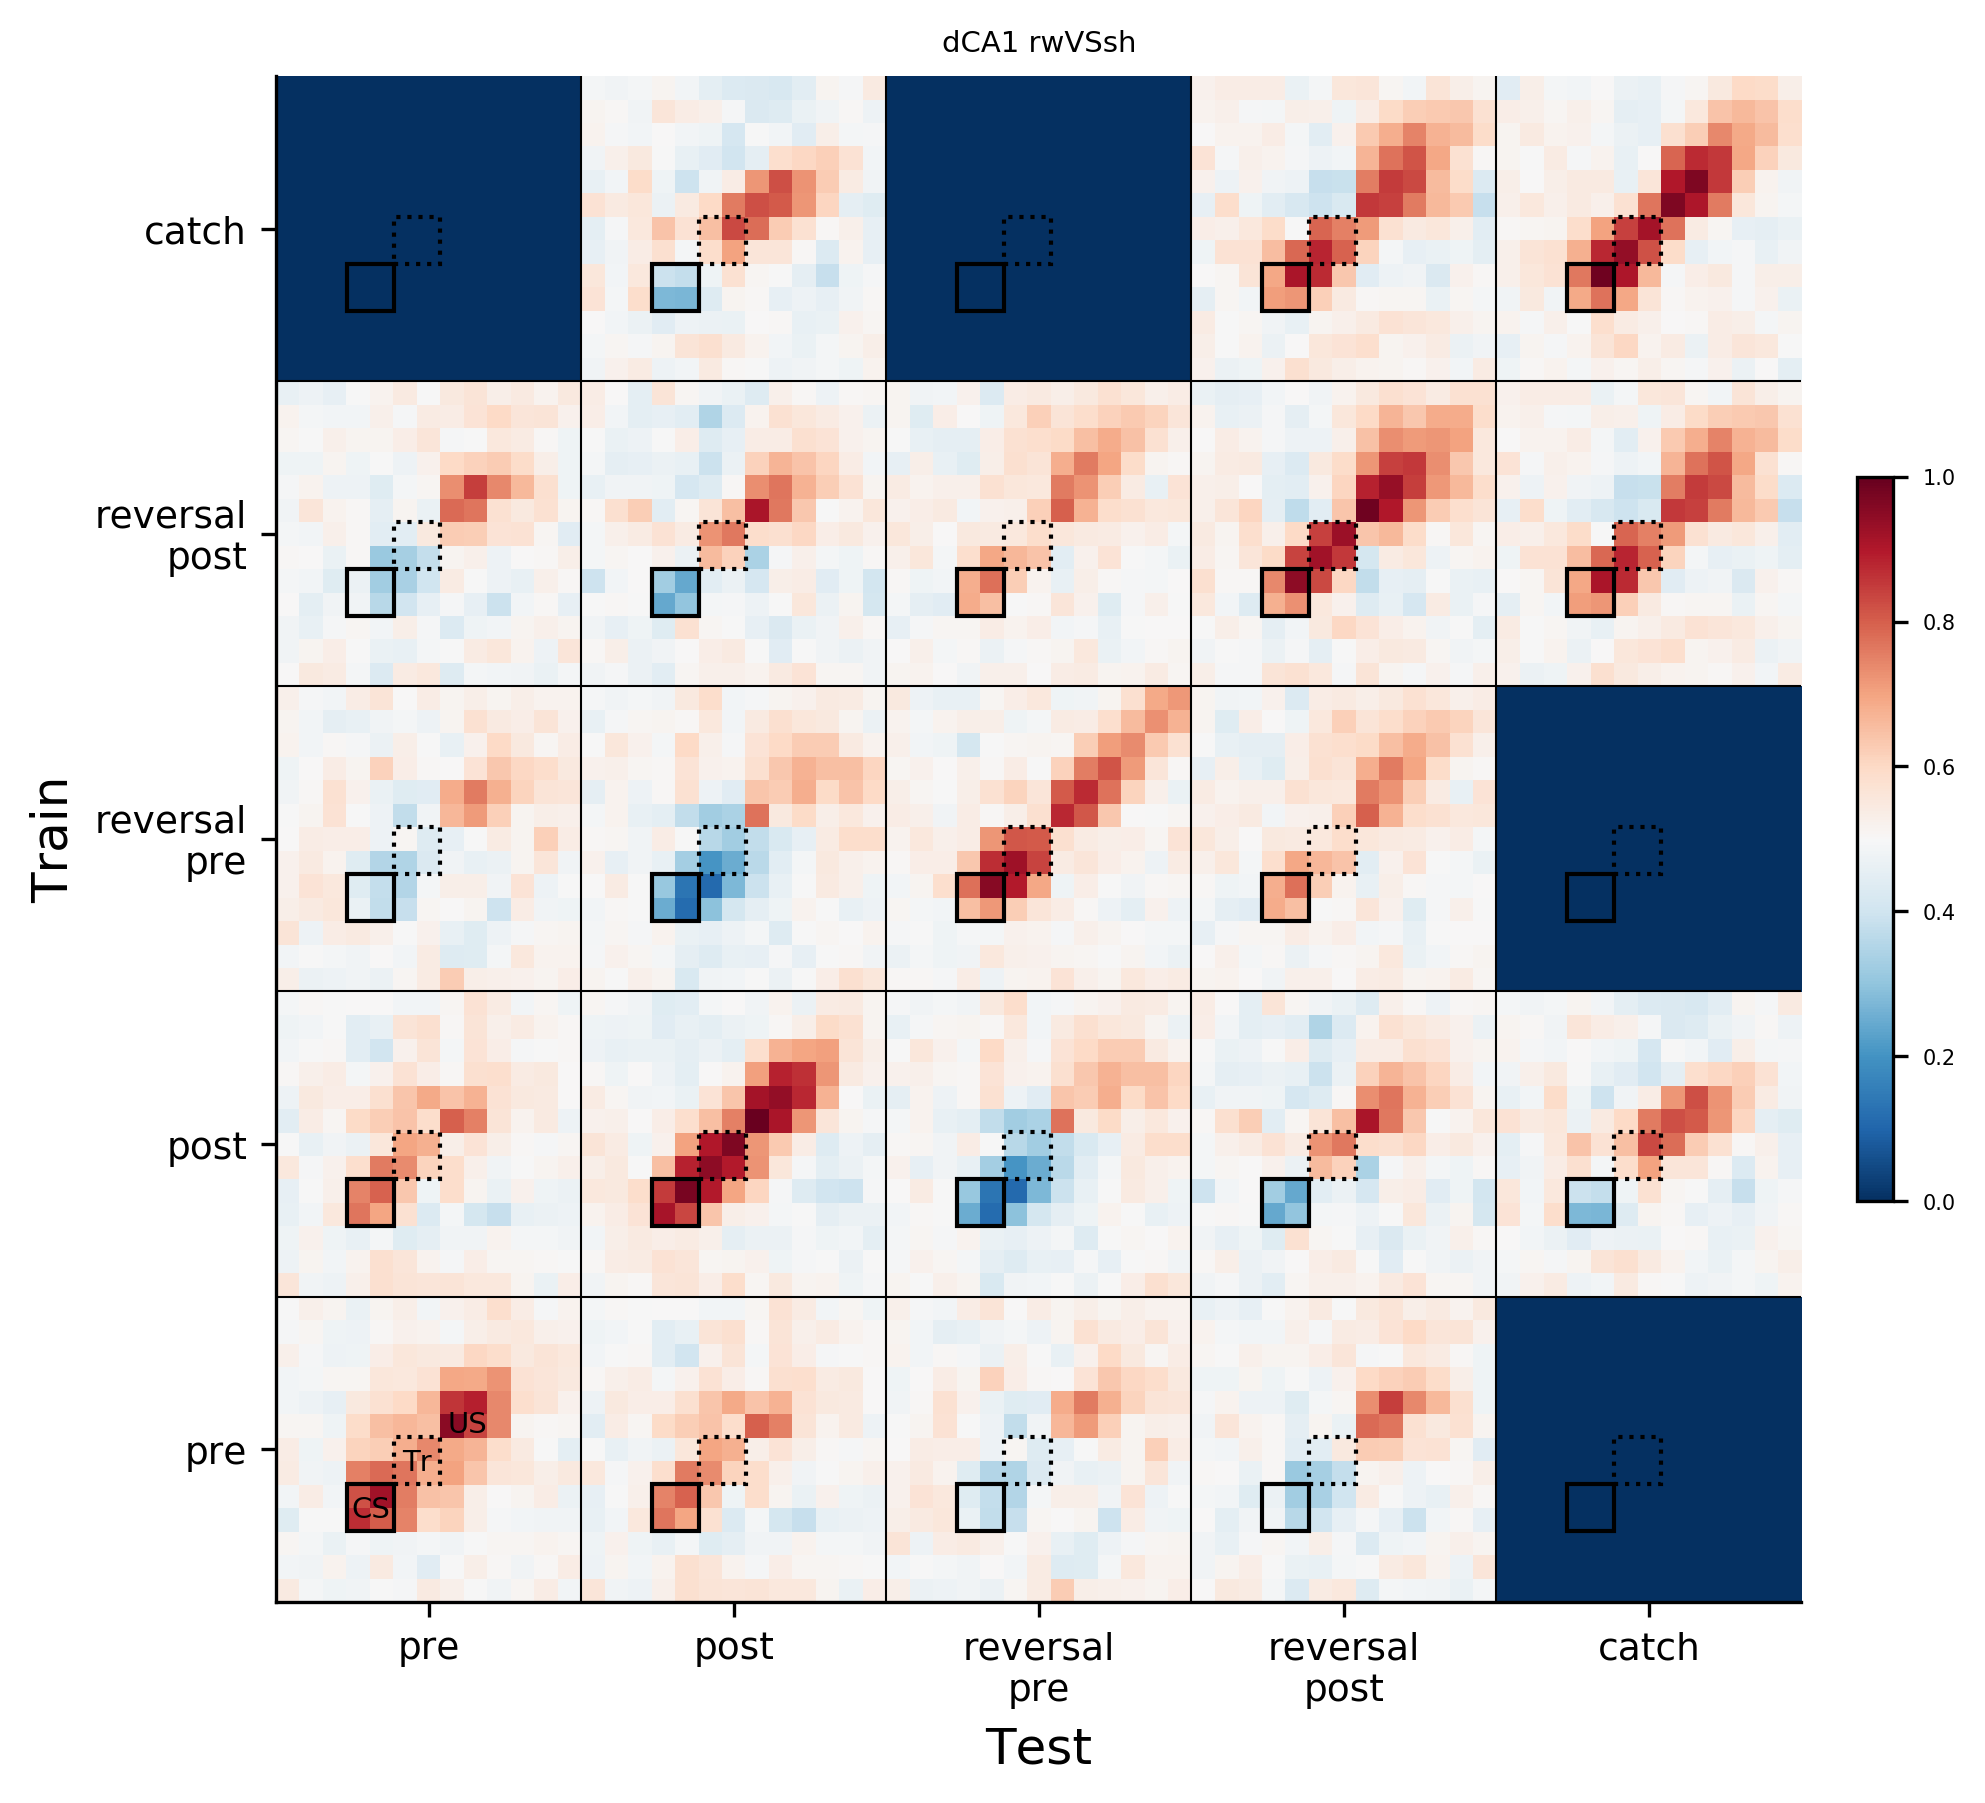

In [17]:
##to_plot = 'all'
#to_plot = 'rwVScsm'
#to_plot = 'shVScsm'
to_plot = 'rwVSsh'
fig,ax = pl.subplots(1,figsize=(8,8))
im = ax.imshow(eval("mega_catch_distinct_means_%s"%to_plot),origin='lower', interpolation='nearest',vmin=0, vmax=1,cmap='RdBu_r')
ticks = [6,19,32,45,58]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_yticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_ylabel('Train', fontsize=12)
ax.set_xlabel('Test', fontsize=12)
pl.hlines([12.5,25.5,38.5,51.5],-0.5,64.5,color='k')
pl.vlines([12.5,25.5,38.5,51.5],-0.5,64.5,color='k')
pl.title("dCA1 "+to_plot)


import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*13+2.5, 0*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS2 = patches.Rectangle((i*13+2.5, 1*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS3 = patches.Rectangle((i*13+2.5, 2*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS4 = patches.Rectangle((i*13+2.5, 3*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS5 = patches.Rectangle((i*13+2.5, 4*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    Tr1 = patches.Rectangle((i*13+4.5, 0*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*13+4.5, 1*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*13+4.5, 2*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*13+4.5, 3*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*13+4.5, 4*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')

# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(2.7,3.1,"CS",fontsize=7, color='k')
pl.text(4.85,5.1,"Tr",fontsize=7, color='k')
pl.text(6.8,6.7,"US",fontsize=7, color='k')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, shrink=0.4, pad=0.03)

fig.savefig('../figures/%s_MEGA_MATRIX_with_catch_%s.pdf'%(NOTEBOOK_NAME,to_plot))

## Now look at results when using maximum cells

In [46]:
for t in range(13):
    #exec('distinct_all_%s = {}'%t)
    exec('max_distinct_rwVScsm_%s = {}'%t)
    exec('max_distinct_shVScsm_%s = {}'%t)
    exec('max_distinct_rwVSsh_%s = {}'%t)
AC = all_comparisons    
for vs in 'rwVScsm','shVScsm','rwVSsh':
    for i in range(0,len(AC),2):
        for t in range(13):
            exec("max_distinct_%s_%s['%s__%s__%s'] = []"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("max_distinct_%s_%s['%s__%s__%s']"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1])).insert(c,(eval('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,AC[i].split('__')[0],
                                AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))))

for vs in 'rwVScsm','shVScsm','rwVSsh':
    for comp in all_comparisons:
        for t in range(13):
            exec("max_distinct_%s_%s['%s__%s__%s'] = []"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct%s['%s_%s_%s']"%(t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
                eval("max_distinct_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1])).insert(c,(eval('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,comp.split('__')[0],
                                comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))))

In [47]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("max_distinct_%s={}"%vs)
    for i in distinct_rwVSsh_0:
        exec("max_distinct_%s[i]=[]"%vs)
        for r in range(len(distinct_rwVSsh_0[i])):
            eval("max_distinct_%s[i]"%vs).append(eval("max_distinct_%s_%s"%(vs,r))[i])
        np.array([eval("max_distinct_%s[i]"%vs)])

In [48]:
for t in range(13):
    #exec('distinct_means_all_%s = {}'%t)
    exec('max_distinct_means_rwVScsm_%s = {}'%t)
    exec('max_distinct_means_shVScsm_%s = {}'%t)
    exec('max_distinct_means_rwVSsh_%s = {}'%t)

AC = all_comparisons    

for vs in 'rwVScsm','shVScsm','rwVSsh':
    for i in range(0,len(AC),2):
        for t in range(13):
            exec("max_distinct_means_%s_%s['%s__%s__%s'] = []"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct_means%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("max_distinct_means_%s_%s['%s__%s__%s']"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],
                    AC[i+1].split('__')[-1])).insert(c,(eval('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,AC[i].split('__')[0],
                    AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c)).mean(1)).mean())

for vs in 'rwVScsm','shVScsm','rwVSsh':
    for comp in all_comparisons:
        for t in range(13):
            exec("max_distinct_means_%s_%s['%s__%s__%s'] = []"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
            for c in range(13):
                #print t, eval("distinct_means%s['%s_%s_%s']"%(t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
                eval("max_distinct_means_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],
                    comp.split('__')[-1])).insert(c,(eval('%s_max_scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,comp.split('__')[0],
                    comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c)).mean(1)).mean())

In [49]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("max_distinct_means_%s={}"%vs)
    for i in distinct_means_rwVSsh_0:
        exec("max_distinct_means_%s[i]=[]"%vs)
        for r in range(len(distinct_means_rwVSsh_0[i])):
            eval("max_distinct_means_%s[i]"%vs).append(eval("max_distinct_means_%s_%s"%(vs,r))[i])
        np.array([eval("max_distinct_means_%s[i]"%vs)])

mega_max_list_col1 = ['preVSpost__pre__pre'],['preVSpost__pre__post'],['preVSpre_rev__pre__pre_rev'],['preVSpost_rev__pre__post_rev']
mega_max_list_col2 = ['preVSpost__pre__post'],['postVSpre_rev__post__post'],['postVSpre_rev__post__pre_rev'],['postVSpost_rev__post__post_rev']
mega_max_list_col3 = ['preVSpre_rev__pre__pre_rev'],['postVSpre_rev__post__pre_rev'],['postVSpre_rev__pre_rev__pre_rev'],['pre_revVSpost_rev__pre_rev__post_rev']
mega_max_list_col4 = ['preVSpost_rev__pre__post_rev'],['postVSpost_rev__post__post_rev'],['pre_revVSpost_rev__pre_rev__post_rev'],['postVSpost_rev__post_rev__post_rev']

for vs in 'rwVScsm','shVScsm','rwVSsh':
    for col in range(1,5):
        exec("mega_max_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,vs))
        for x in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
            exec("mega_max_col%s_%s[x] = []"%(col,vs))
            for c in range(len(mega_list_col1)):
                for comp in eval("mega_max_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
                        #print col,x,c,comp,y,'ok',
                        eval("mega_max_col%s_%s[x]"%(col,vs)).insert((14*c)+y, eval("max_distinct_means_%s_%s[comp][y]"%(vs,x)))

for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("mega_max_distinct_means_%s = mega_max_col1_%s +mega_max_col2_%s +mega_max_col3_%s +mega_max_col4_%s"%(vs,vs,vs,vs,vs))

##to_plot = 'all'
#to_plot = 'rwVScsm'
#to_plot = 'shVScsm'
to_plot = 'rwVSsh'
fig,ax = pl.subplots(1,figsize=(8,8))
im = ax.imshow(eval("mega_max_distinct_means_%s"%to_plot),origin='lower', interpolation='nearest',vmin=0, vmax=1,cmap='bwr')
ticks = [12,37,62,87]
ax.set_xticks(ticks)
#ax.set_xticks((6,22,38,54,70),minor=True)
ax.set_yticks(ticks)
#ax.set_yticks((6,22,38,54,70),minor=True)
#ax.set_ylim(0,85)
#ax.set_xlim(0,85)
ax.set_xticklabels(['pre','post','reversal\npre','reversal\npost'],fontsize=9)
ax.set_yticklabels(['pre','post','reversal\npre','reversal\npost'],fontsize=9)
ax.set_ylabel('Train', fontsize=12)
ax.set_xlabel('Test', fontsize=12)
pl.hlines([24.5,49.5,74.5],-0.5,99.5,color='k')
pl.vlines([24.5,49.5,74.5],-0.5,99.5,color='k')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title("vCA1\n 0.5s bin decoding accuracy, "+to_plot)
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(4):
    CS1 = patches.Rectangle((i*25+5.5, 0*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS2 = patches.Rectangle((i*25+5.5, 1*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS3 = patches.Rectangle((i*25+5.5, 2*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS4 = patches.Rectangle((i*25+5.5, 3*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    Tr1 = patches.Rectangle((i*25+9.5, 0*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*25+9.5, 1*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*25+9.5, 2*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*25+9.5, 3*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)

pl.text(6.2,81.7,"CS",fontsize=7, color='k')
pl.text(10.4,85.7,"Tr",fontsize=7, color='k')
pl.text(13.4,89,"US",fontsize=7, color='k')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, shrink=0.4, pad=0.03)

fig.savefig('../img/%s_MEGA_max_MATRIX_%s.jpg'%(NOTEBOOK_NAME,to_plot))

In [50]:
mega_max_catch_list_col1 = ['preVSpost__pre__pre'],['preVSpost__pre__post'],['preVSpre_rev__pre__pre_rev'],['preVSpost_rev__pre__post_rev'],['zeroes']
mega_max_catch_list_col2 = ['preVSpost__pre__post'],['postVSpre_rev__post__post'],['postVSpre_rev__post__pre_rev'],['postVSpost_rev__post__post_rev'],['postVScatch__post__catch']
mega_max_catch_list_col3 = ['preVSpre_rev__pre__pre_rev'],['postVSpre_rev__post__pre_rev'],['postVSpre_rev__pre_rev__pre_rev'],['pre_revVSpost_rev__pre_rev__post_rev'],['zeroes']
mega_max_catch_list_col4 = ['preVSpost_rev__pre__post_rev'],['postVSpost_rev__post__post_rev'],['pre_revVSpost_rev__pre_rev__post_rev'],['postVSpost_rev__post_rev__post_rev'],['post_revVScatch__post_rev__catch'],
mega_max_catch_list_col5 = ['zeroes'],['postVScatch__post__catch'],['zeroes'],['post_revVScatch__post_rev__catch'],['post_revVScatch__catch__catch']

In [51]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    for col in range(1,6): # how many entries are there in each list?
        exec("mega_max_catch_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,vs))
        for x in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
            exec("mega_max_catch_col%s_%s[x] = []"%(col,vs))
            for c in range(5): #how many lists are there
                for comp in eval("mega_max_catch_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct_means_rwVSsh_0['preVSpost__pre__post'])):
                        #print col,x,c,comp,y,'ok',
                        if comp == 'zeroes':
                            eval("mega_max_catch_col%s_%s[x]"%(col,vs)).insert((13*c)+y, 0)
                        else:
                            eval("mega_max_catch_col%s_%s[x]"%(col,vs)).insert((13*c)+y, eval("max_distinct_means_%s_%s[comp][y]"%(vs,x)))

In [52]:
for vs in 'rwVScsm','shVScsm','rwVSsh':
    exec("mega_max_catch_distinct_means_%s = mega_max_catch_col1_%s +mega_max_catch_col2_%s +mega_max_catch_col3_%s +mega_max_catch_col4_%s +\
    mega_max_catch_col5_%s"%(vs,vs,vs,vs,vs,vs))

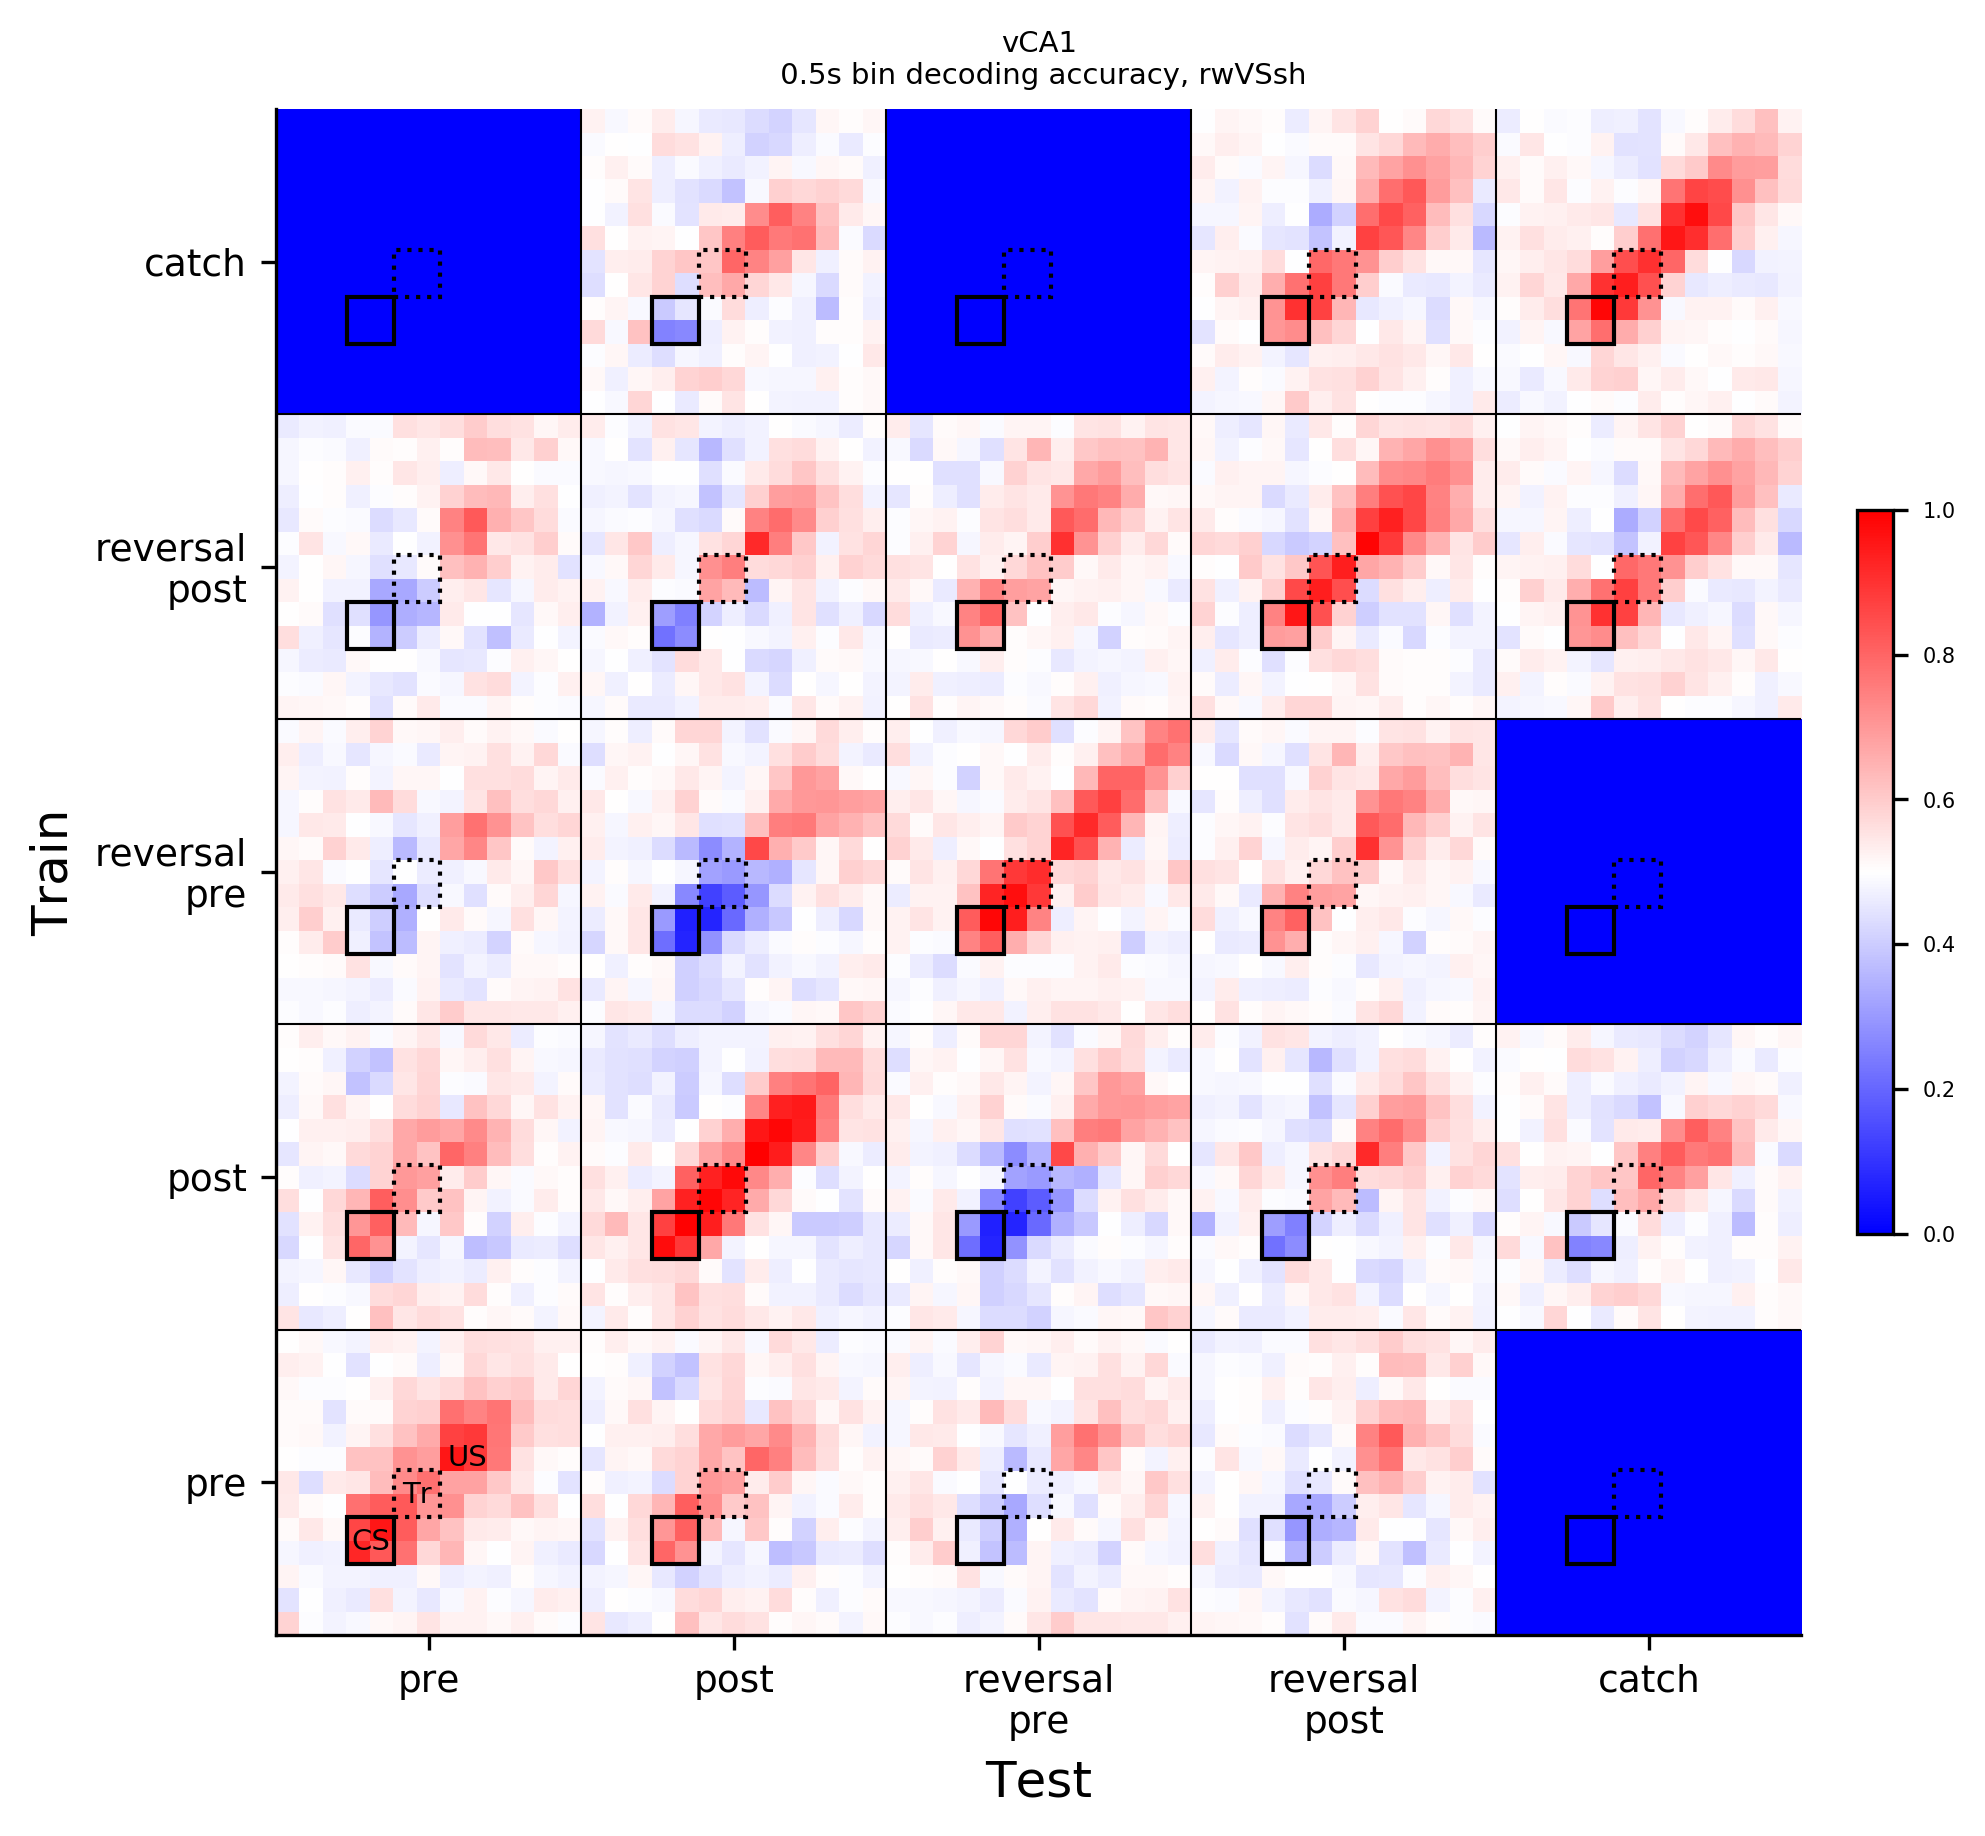

In [53]:
##to_plot = 'all'
#to_plot = 'rwVScsm'
#to_plot = 'shVScsm'
to_plot = 'rwVSsh'
fig,ax = pl.subplots(1,figsize=(8,8))
im = ax.imshow(eval("mega_max_catch_distinct_means_%s"%to_plot),origin='lower', interpolation='nearest',vmin=0, vmax=1,cmap='bwr')
ticks = [6,19,32,45,58]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_yticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_ylabel('Train', fontsize=12)
ax.set_xlabel('Test', fontsize=12)
pl.hlines([12.5,25.5,38.5,51.5],-0.5,64.5,color='k')
pl.vlines([12.5,25.5,38.5,51.5],-0.5,64.5,color='k')
pl.title("vCA1\n 0.5s bin decoding accuracy, "+to_plot)


import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*13+2.5, 0*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS2 = patches.Rectangle((i*13+2.5, 1*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS3 = patches.Rectangle((i*13+2.5, 2*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS4 = patches.Rectangle((i*13+2.5, 3*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    CS5 = patches.Rectangle((i*13+2.5, 4*13+2.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    Tr1 = patches.Rectangle((i*13+4.5, 0*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*13+4.5, 1*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*13+4.5, 2*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*13+4.5, 3*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*13+4.5, 4*13+4.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')

# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(2.7,3.1,"CS",fontsize=7, color='k')
pl.text(4.85,5.1,"Tr",fontsize=7, color='k')
pl.text(6.8,6.7,"US",fontsize=7, color='k')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, shrink=0.4, pad=0.03)

fig.savefig('../img/%s_MEGA_MATRIX_with_catch_%s.jpg'%(NOTEBOOK_NAME,to_plot))

In [54]:
#import matplotlib.patches as patches
#fig, ax = pl.subplots(len(distinct_means_rwVSsh), 1, figsize=(3,40))#, sharex=True, sharey=True)
#vmin=0.5
#vmax=1
#for i,t in zip(range(len(distinct_means_rwVSsh)),distinct_means_rwVSsh):
#    im = ax[i].imshow(distinct_means_rwVSsh[t],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
#    ax[i].set_title(t)
#
#for x in range(len(distinct_means_rwVSsh)):
#    ax[x].set_xticks(range(13))
#    ax[x].set_yticks(range(13))
#    #ax[x].set_ylim(-2, 10)
#    #ax[x].set_xlim(-2, 10)
#    ax[x].set_xticklabels(['-3','','-2','','-1','','0\nCS','','1\nCS','','2\nTr','','3\nTr',
#                          '','4\nUS','','5','','6','','7','','8','','9','','10'],fontsize=3.5)
#    ax[x].set_yticklabels(['-3 to -2.5','','-2','','-1','','CS 0','','CS 1','','Tr 2','','Tr 3',
#                          '','US 4','','5','','6','','7','','8','','9','','10'],fontsize=3.5)
#    ax[x].set_ylabel('Time(s) from CS onset', fontsize=5)
#    ax[x].set_xlabel('Time(s) from CS onset', fontsize=5)
#
### Create a Rectangle patch
##CS = patches.Rectangle((8.5, 8.5),4,4,linewidth=.4,edgecolor='w',facecolor='none')  
##Tr = patches.Rectangle((12.5, 12.5),4,4,linewidth=.4,edgecolor='w',facecolor='none',ls=':')    
##ax[0].add_patch(CS)
##ax[0].add_patch(Tr)
#
## axs[0].set_xticklabels(np.arange(len(np.unique(labels)))+1)
## axs[0].set_yticklabels(np.arange(len(np.unique(labels)))+1)
#
##cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
#fig.colorbar(im)#, cax=cax)
#fig.tight_layout(pad=2.5)
##fig.savefig('../img/%s.jpg'%NOTEBOOK_NAME)

In [55]:
for x in zip (range(len(distinct_shVScsm.keys())),distinct_shVScsm.keys()):
    print x

(0, 'preVSpre_rev__pre__pre_rev')
(1, 'preVSpost_rev__pre__post_rev')
(2, 'postVSpost_rev__post_rev__post_rev')
(3, 'postVScatch__post__post')
(4, 'pre_revVSpost_rev__pre_rev__post_rev')
(5, 'post_revVScatch__post_rev__post_rev')
(6, 'post_revVScatch__catch__catch')
(7, 'postVSpost_rev__post__post')
(8, 'pre_revVSpost_rev__post_rev__post_rev')
(9, 'postVSpre_rev__post__post')
(10, 'preVSpre_rev__pre_rev__pre_rev')
(11, 'postVSpost_rev__post__post_rev')
(12, 'pre_revVSpost_rev__pre_rev__pre_rev')
(13, 'preVSpost__post__post')
(14, 'preVSpre_rev__pre__pre')
(15, 'postVSpre_rev__post__pre_rev')
(16, 'preVSpost__pre__post')
(17, 'postVScatch__catch__catch')
(18, 'preVSpost_rev__post_rev__post_rev')
(19, 'post_revVScatch__post_rev__catch')
(20, 'preVSpost_rev__pre__pre')
(21, 'postVSpre_rev__pre_rev__pre_rev')
(22, 'postVScatch__post__catch')
(23, 'preVSpost__pre__pre')


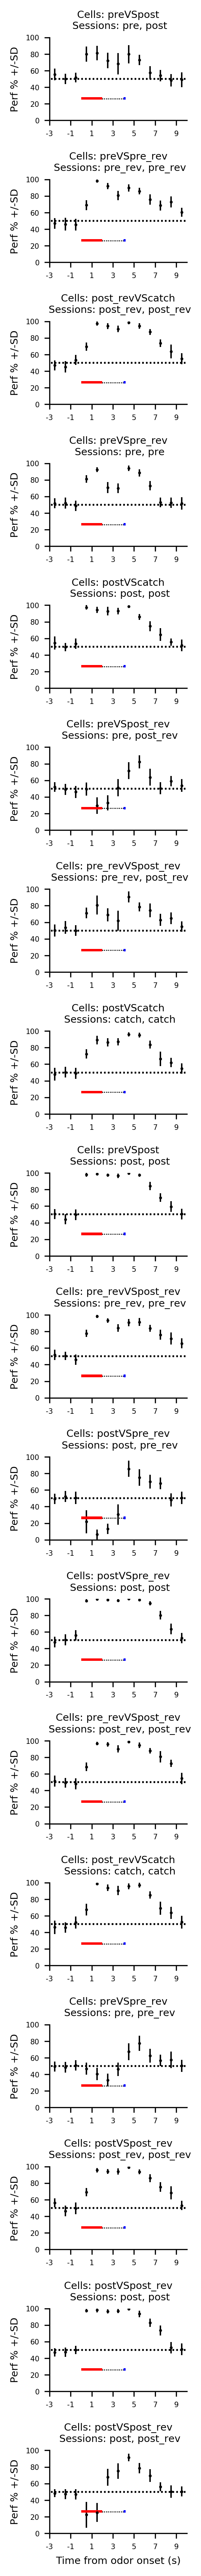

In [56]:
#to_plot = 'all'
#to_plot = 'rwVScsm'
#to_plot = 'shVScsm'
to_plot = 'rwVSsh'

order=[]
for x in [16,10,5,14,3,1,4,17,13,12,15,9,8,6,0,2,7,11]:
    order.append(eval("max_distinct_%s.keys()[x]"%to_plot))

fig, ax = pl.subplots(len(order),1, figsize=(2, 25))    

for i,t in zip(range(len(order)),order):
    for r in range(13):
        ax[i].plot(r-2.5, np.mean(eval("max_distinct_%s"%to_plot)[t][r][r])*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1)
        m = np.mean(eval("max_distinct_%s"%to_plot)[t][r][r])*100
        s = np.std(eval("max_distinct_%s"%to_plot)[t][r][r])*100
        ax[i].errorbar(r-2.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-3, 10)
        ax[i].set_xticks(np.arange(-3,10, 2))
        ax[i].set_xticklabels(np.arange(-3,10, 2))
        ax[i].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title('Cells: ' + t.split('__')[0] +'\n Sessions: ' + t.split('__')[-2] + ', ' + t.split('__')[-1])
ax[i].set_xlabel('Time from odor onset (s)')


fig.tight_layout(pad=2)

fig.savefig('../img/%s_tb_matched_max_distinct_%s.jpg'%(NOTEBOOK_NAME,to_plot))

## now use all trials for decoding (not a subset, like above).
If only interested in across-session results, this should give better results than the above. But within-session still uses subset of trials (split into training and testing datasets), so shouldn't compare across and within results here

In [57]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_within(patterns, labels, n_cells=None, classes=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    if classes == None:
        classes = [0,1]
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [58]:
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_cross(patterns_t, labels_t, patterns_T, labels_T, n_cells=None, classes=None):
#     which_train = range(90)
#     which_test = range(90)

    if classes == None:
        classes = [0,1]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        #print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        #print cells.shape,
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [59]:
%%time
#test across (and within) time bins within a session
#need to overwrite within tb comparisons later, because here it uses same data to train & test
n_loops=15
for comp in all_comparisons:
    for t in range(13):
        for c in range(13):
            exec('rwVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))
            #print comp,t,c," ",
            exec('rwVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_rwVScsm_%s,%s_tb_%s,labels_rwVScsm_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c,
                                        comp,t,comp.split('__')[-1],comp,c,comp.split('__')[-1]))

CPU times: user 20min 24s, sys: 1.22 s, total: 20min 25s
Wall time: 20min 23s


In [60]:
%%time
#decode within time bin, using cell reg cells
#these data will eventually replace the within time bin data above when collating everything into one list
n_loops=15
for t in range(13):
#    for c in range(13):
        for comp in all_comparisons:
            exec('rwVScsm_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = []'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t))
            #print comp,t," ",
            exec('rwVScsm_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within(%s_tb_%s,labels_rwVScsm_%s,n_cells=n_cells)\
            for i in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t,
                                        comp,t,comp.split('__')[-1]))

200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 218 218 218 218 218 218 218 218 218 218 

In [61]:
%%time
#test across session pairs
n_loops=15
AC = all_comparisons
for i in range(0,len(AC),2):
    for t in range(13):
        for c in range(13):
            exec('rwVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))
            #print AC[i],t,c," ",
            exec('rwVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_rwVScsm_%s,%s_tb_%s,labels_rwVScsm_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c,
                                        AC[i],t,AC[i].split('__')[-1],AC[i+1],c,AC[i+1].split('__')[-1]))

CPU times: user 9min 58s, sys: 580 ms, total: 9min 59s
Wall time: 9min 58s


In [62]:
%%time
#test across (and within) time bins within a session
#need to overwrite within tb comparisons later, because here it uses same data to train & test
n_loops=15
for comp in all_comparisons:
    for t in range(13):
        for c in range(13):
            exec('shVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))
            #print comp,t,c," ",
            exec('shVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_shVScsm_%s,%s_tb_%s,labels_shVScsm_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c,
                                        comp,t,comp.split('__')[-1],comp,c,comp.split('__')[-1]))

CPU times: user 20min 49s, sys: 1.31 s, total: 20min 50s
Wall time: 20min 48s


In [63]:
%%time
#decode within time bin, using cell reg cells
#these data will eventually replace the within time bin data above when collating everything into one list
n_loops=15
for t in range(13):
#    for c in range(13):
        for comp in all_comparisons:
            exec('shVScsm_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = []'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t))
            #print comp,t," ",
            exec('shVScsm_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within(%s_tb_%s,labels_shVScsm_%s,n_cells=n_cells)\
            for i in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t,
                                        comp,t,comp.split('__')[-1]))

200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 218 218 218 218 218 218 218 218 218 218 

In [64]:
%%time
#test across session pairs
n_loops=15
AC = all_comparisons
for i in range(0,len(AC),2):
    for t in range(13):
        for c in range(13):
            exec('shVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))
            #print AC[i],t,c," ",
            exec('shVScsm_scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_shVScsm_%s,%s_tb_%s,labels_shVScsm_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c,
                                        AC[i],t,AC[i].split('__')[-1],AC[i+1],c,AC[i+1].split('__')[-1]))

CPU times: user 10min 23s, sys: 624 ms, total: 10min 24s
Wall time: 10min 23s


In [65]:
%%time
#test across (and within) time bins within a session
#need to overwrite within tb comparisons later, because here it uses same data to train & test
n_loops=15
for comp in all_comparisons:
    for t in range(13):
        for c in range(13):
            exec('rwVSsh_scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))
            #print comp,t,c," ",
            exec('rwVSsh_scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_rwVSsh_%s,%s_tb_%s,labels_rwVSsh_%s,n_cells=None)\
            for r in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c,
                                        comp,t,comp.split('__')[-1],comp,c,comp.split('__')[-1]))

360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 

In [66]:
%%time
#decode within time bin, using cell reg cells
#these data will eventually replace the within time bin data above when collating everything into one list
n_loops=15
for t in range(13):
#    for c in range(13):
        for comp in all_comparisons:
            exec('rwVSsh_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = []'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t))
            #print comp,t," ",
            exec('rwVSsh_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within(%s_tb_%s,labels_rwVSsh_%s,n_cells=None)\
            for i in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t,
                                        comp,t,comp.split('__')[-1]))

CPU times: user 1min 26s, sys: 80 ms, total: 1min 26s
Wall time: 1min 26s


In [67]:
%%time
#test across session pairs
n_loops=15
AC = all_comparisons
for i in range(0,len(AC),2):
    for t in range(13):
        for c in range(13):
            exec('rwVSsh_scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))
            #print AC[i],t,c," ",
            exec('rwVSsh_scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_rwVSsh_%s,%s_tb_%s,labels_rwVSsh_%s,n_cells=None)\
            for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c,
                                        AC[i],t,AC[i].split('__')[-1],AC[i+1],c,AC[i+1].split('__')[-1]))

360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 

### organize data for plotting. First collect all data into array, then make diff arrays with just the means (for implots)
it's a mess, I know. But it's functional!

In [68]:
for t in range(13):
    #exec('testy_all_%s = {}'%t)
    exec('testy_rwVScsm_%s = {}'%t)
    exec('testy_shVScsm_%s = {}'%t)
    exec('testy_rwVSsh_%s = {}'%t)
    
for vs in 'rwVSsh',:  #'all','rwVScsm','shVScsm','rwVSsh':
    for i in range(0,len(AC),2):
        for t in range(13):
            exec("testy_%s_%s['%s__%s__%s'] = []"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
            for c in range(13):
                #print t, eval("testy%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("testy_%s_%s['%s__%s__%s']"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1])).insert(c,(eval('%s_scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,AC[i].split('__')[0],
                                AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c))))
   
for vs in 'rwVSsh',:  #'all','rwVScsm','shVScsm','rwVSsh':
    for comp in all_comparisons:
        for t in range(13):
            exec("testy_%s_%s['%s__%s__%s'] = []"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
            for c in range(13):
                #print t, eval("testy%s['%s_%s_%s']"%(t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
                eval("testy_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1])).insert(c,(eval('%s_scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,comp.split('__')[0],
                                comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c))))

In [69]:
#and now replace within-session score from above with score where test and train data are taken from different bins
for vs in 'rwVSsh',: #'all','rwVScsm','shVScsm','rwVSsh':
    for comp in all_comparisons:
        for t in range(13):
            eval("testy_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],
                                        comp.split('__')[-1]))[t] = eval('%s_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,comp.split('__')[0],
                                        comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t))

In [70]:
for vs in 'rwVSsh',: #'all','rwVScsm','shVScsm','rwVSsh':
    exec("testy_%s={}"%vs)
    for i in eval("testy_%s_0"%vs):
        exec("testy_%s[i]=[]"%vs)
        for r in range(len(eval("testy_%s_0"%vs)[i])):
            eval("testy_%s[i]"%vs).append(eval("testy_%s_%s"%(vs,r))[i])
        np.array([eval("testy_%s[i]"%vs)])

In [71]:
for t in range(13):
    #exec('testy_means_all_%s = {}'%t)
    exec('testy_means_rwVScsm_%s = {}'%t)
    exec('testy_means_shVScsm_%s = {}'%t)
    exec('testy_means_rwVSsh_%s = {}'%t)
    
for vs in 'rwVSsh',: #'all','rwVScsm','shVScsm',
    for i in range(0,len(AC),2):
        for t in range(13):
            exec("testy_means_%s_%s['%s__%s__%s'] = []"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
            for c in range(13):
                #print t, eval("testy_means%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("testy_means_%s_%s['%s__%s__%s']"%(vs,t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1])).insert(c,(eval('%s_scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,AC[i].split('__')[0],
                                AC[i].split('__')[-1],t,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],c)).mean(1)).mean())

for vs in 'rwVSsh',: #'all','rwVScsm','shVScsm',
    for comp in all_comparisons:
        for t in range(13):
            exec("testy_means_%s_%s['%s__%s__%s'] = []"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
            for c in range(13):
                #print t, eval("testy_means%s['%s_%s_%s']"%(t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
                eval("testy_means_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1])).insert(c,(eval('%s_scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(vs,comp.split('__')[0],
                                comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],c)).mean(1)).mean())

In [72]:
#and now replace within-session score from above with score where test and train data are taken from different bins
for vs in 'rwVSsh',: #'all','rwVScsm','shVScsm',
    for comp in all_comparisons:
        for t in range(13):
            eval("testy_means_%s_%s['%s__%s__%s']"%(vs,t,comp.split('__')[0],comp.split('__')[-1],
                                        comp.split('__')[-1]))[t] = eval('%s_scores_win_%s_%s_tb%s_VS_%s_%s_tb%s.mean(1).mean()'%(vs,comp.split('__')[0],
                                        comp.split('__')[-1],t,comp.split('__')[0],comp.split('__')[-1],t))

In [73]:
for vs in 'rwVSsh',: #'all','rwVScsm','shVScsm',
    exec("testy_means_%s={}"%vs)
    for i in testy_means_rwVSsh_0:
        exec("testy_means_%s[i]=[]"%vs)
        for r in range(len(testy_means_rwVSsh_0[i])):
            eval("testy_means_%s[i]"%vs).append(eval("testy_means_%s_%s"%(vs,r))[i])
        np.array([eval("testy_means_%s[i]"%vs)])

In [74]:
for x in zip (range(len(testy_rwVSsh.keys())),testy_rwVSsh.keys()):
    print x

(0, 'preVSpre_rev__pre__pre_rev')
(1, 'preVSpost_rev__pre__post_rev')
(2, 'postVSpost_rev__post_rev__post_rev')
(3, 'postVScatch__post__post')
(4, 'pre_revVSpost_rev__pre_rev__post_rev')
(5, 'post_revVScatch__post_rev__post_rev')
(6, 'post_revVScatch__catch__catch')
(7, 'postVSpost_rev__post__post')
(8, 'pre_revVSpost_rev__post_rev__post_rev')
(9, 'postVSpre_rev__post__post')
(10, 'preVSpre_rev__pre_rev__pre_rev')
(11, 'postVSpost_rev__post__post_rev')
(12, 'pre_revVSpost_rev__pre_rev__pre_rev')
(13, 'preVSpost__post__post')
(14, 'preVSpre_rev__pre__pre')
(15, 'postVSpre_rev__post__pre_rev')
(16, 'preVSpost__pre__post')
(17, 'postVScatch__catch__catch')
(18, 'preVSpost_rev__post_rev__post_rev')
(19, 'post_revVScatch__post_rev__catch')
(20, 'preVSpost_rev__pre__pre')
(21, 'postVSpre_rev__pre_rev__pre_rev')
(22, 'postVScatch__post__catch')
(23, 'preVSpost__pre__pre')


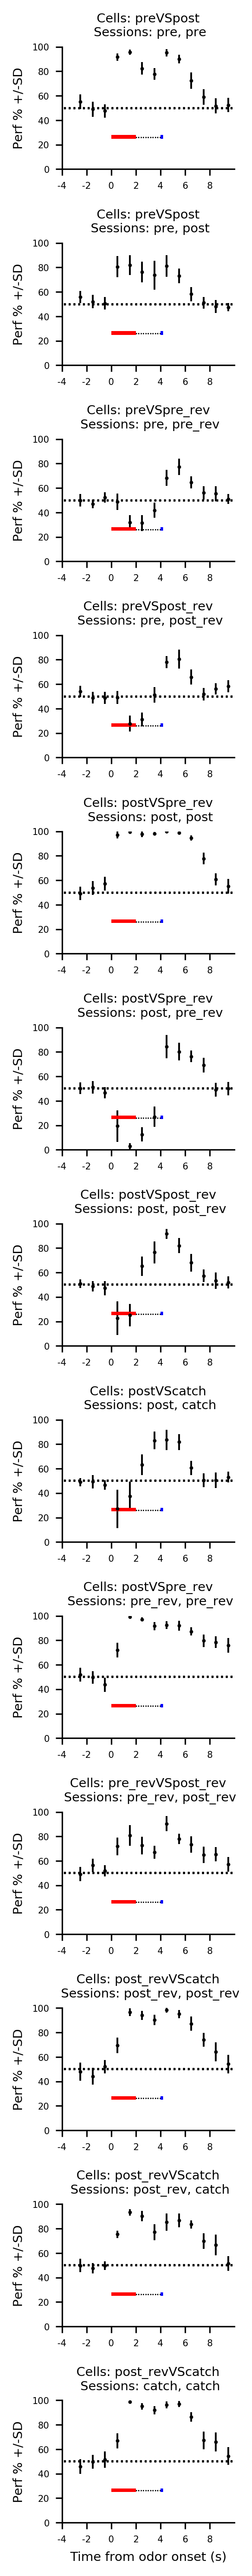

In [83]:
#to_plot = 'all'
#to_plot = 'rwVScsm'
#to_plot = 'shVScsm'
to_plot = 'rwVSsh'

order=[]
for x in [23,16,0,1,9,15,11,22,21,4,5,19,6]:
    order.append(eval("testy_%s.keys()[x]"%to_plot))

fig, ax = pl.subplots(len(order),1, figsize=(2, 20))    

for i,t in zip(range(len(order)),order):
    for r in range(13):
        ax[i].plot((r)-2.5, np.mean(eval("testy_%s"%to_plot)[t][r][r])*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1)
        m = np.mean(eval("testy_%s"%to_plot)[t][r][r])*100
        s = np.std(eval("testy_%s"%to_plot)[t][r][r])*100
        ax[i].errorbar((r)-2.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-4, 10)
        ax[i].set_xticks(np.arange(-4,10, 2))
        ax[i].set_xticklabels(np.arange(-4,10, 2))
        ax[i].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title('Cells: ' + t.split('__')[0] +'\n Sessions: ' + t.split('__')[-2] + ', ' + t.split('__')[-1])
ax[i].set_xlabel('Time from odor onset (s)')


fig.tight_layout(pad=2)

#fig.savefig('../img/%s_tb_matched_%s.jpg'%(NOTEBOOK_NAME,to_plot))

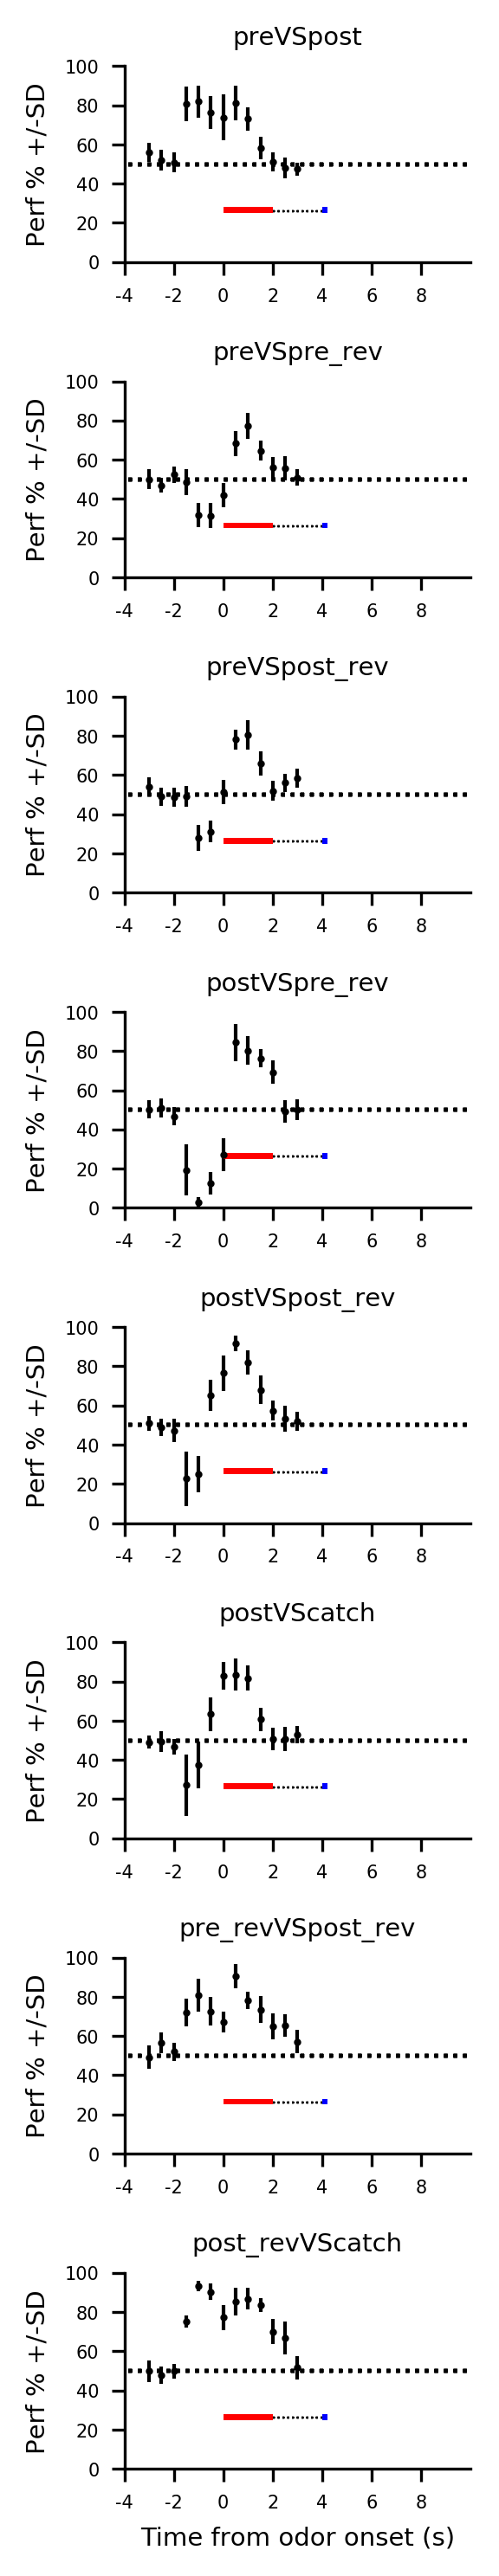

In [76]:
#across session only
fig, ax = pl.subplots(8,1, figsize=(2, 10))
across=[]
for x in [16,0,1,15,11,22,4,19]:
    across.append(testy_rwVSsh.keys()[x])
for i,t in zip(range(len(across)),across):
    for r in range(13):
        ax[i].plot((r/2.0)-3, np.mean(testy_rwVSsh[t][r][r])*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1)
        m = np.mean(testy_rwVSsh[t][r][r])*100
        s = np.std(testy_rwVSsh[t][r][r])*100
        ax[i].errorbar((r/2.0)-3, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-4, 10)
        ax[i].set_xticks(np.arange(-4,10, 2))
        ax[i].set_xticklabels(np.arange(-4,10, 2))
        ax[i].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title(t.split('__')[0])
ax[i].set_xlabel('Time from odor onset (s)')


fig.tight_layout(pad=2)

fig.savefig('../img/%s_across_tb_matched.jpg'%NOTEBOOK_NAME)

In [77]:
#fig, ax = pl.subplots(len(testy_means_rwVSsh), 1, figsize=(3,40))#, sharex=True, sharey=True)
#vmin=0.5
#vmax=1
#for i,t in zip(range(len(testy_means_rwVSsh)),testy_means_rwVSsh):
#    im = ax[i].imshow(testy_means_rwVSsh[t],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
#    ax[i].set_title(t)
#    ax[0].set_title('Rw vs Sh, vCA1 Decoding Across Time Bins\n'+t, fontsize=7)
#
#for x in range(len(testy_means_rwVSsh)):
#    ax[x].set_xticks(range(13))
#    ax[x].set_yticks(range(13))
#    #ax[x].set_ylim(-.5, 6.5)
#    #ax[x].set_xlim(-.5, 6.5)
#    ax[x].set_xticklabels(['-3','','-2','','','','CS','','','','Tr','','','','Rw'])
#    ax[x].set_yticklabels(['-3to-2.5','','-2','','1','','(CS) 0','','1','','(Tr) 2','','3','','(Rw) 4'])
#    ax[x].set_ylabel('Time(s) from CS onset', fontsize=5)
#    ax[x].set_xlabel('Time(s) from CS onset', fontsize=5)
#
## axs[0].set_xticklabels(np.arange(len(np.unique(labels)))+1)
## axs[0].set_yticklabels(np.arange(len(np.unique(labels)))+1)
#
#
##cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
#fig.colorbar(im)
#fig.tight_layout(pad=2.5)
##fig.savefig('../img/%s.jpg'%NOTEBOOK_NAME)

In [79]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'patches'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
